## Uploads data sets

In [1]:
# libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Vendas
df_vendas = pd.read_parquet('fato_vendas_varejo.parquet')

# Filias

df_filiais = pd.read_parquet('filiais.parquet')

# Metas Vendas

df_metas_vendas = pd.read_parquet('metas_vendas_varejo.parquet')


In [161]:
df_vendas

,codigo_documento_saida,codigo_filial,data_emissao,quantidade,faturamento,data
0,122854,1803,2025-07-07 00:00:00.000,6.0,135.00018,2025-07-07
1,214007,1743,2025-07-18 00:00:00.000,9.0,222.63408,2025-07-18
2,176406,1794,2025-07-17 00:00:00.000,3.0,389.45259,2025-07-17
3,999220,1614,2025-07-01 00:00:00.000,39.0,707.19615,2025-07-01
4,181499,1761,2025-06-02 00:00:00.000,15.0,194.42790,2025-06-02
...,...,...,...,...,...,...
5534161,100005,1803,2025-03-12 00:00:00.000,3.0,26.66709,2025-03-12
5534162,548192,1641,2025-03-02 00:00:00.000,3.0,73.78209,2025-03-02
5534163,10791,1842,2025-03-30 00:00:00.000,6.0,9.98838,2025-03-30
5534164,667263,1596,2025-03-02 00:00:00.000,6.0,37.62918,2025-03-02


In [3]:
# garantir tipos iguais
df_filiais["codigo_filial"] = pd.to_numeric(df_filiais["codigo_filial"], errors="coerce").astype("Int64")
df_metas_vendas["codigo_filial"] = pd.to_numeric(df_metas_vendas["codigo_filial"], errors="coerce").astype("Int64")
df_vendas["codigo_filial"] = pd.to_numeric(df_vendas["codigo_filial"], errors="coerce").astype("Int64")

fil_filiais = set(df_filiais["codigo_filial"].dropna().unique())
fil_metas   = set(df_metas_vendas["codigo_filial"].dropna().unique())
fil_vendas  = set(df_vendas["codigo_filial"].dropna().unique())

print("Qtd filiais:")
print("df_filiais:", len(fil_filiais))
print("df_metas_vendas:", len(fil_metas))
print("df_vendas:", len(fil_vendas))

print("\nFiliais em VENDAS e não em FILIAIS (qtd):", len(fil_vendas - fil_filiais))
print("Exemplos:", sorted(list(fil_vendas - fil_filiais))[:30])

print("\nFiliais em VENDAS e não em METAS (qtd):", len(fil_vendas - fil_metas))
print("Exemplos:", sorted(list(fil_vendas - fil_metas))[:30])

print("\nFiliais em METAS e não em FILIAIS (qtd):", len(fil_metas - fil_filiais))
print("Exemplos:", sorted(list(fil_metas - fil_filiais))[:30])

print("\nInterseção (filiais presentes nos 3):", len(fil_vendas & fil_metas & fil_filiais))


Qtd filiais:
df_filiais: 124
df_metas_vendas: 125
df_vendas: 125

Filiais em VENDAS e não em FILIAIS (qtd): 1
Exemplos: [np.int64(1704)]

Filiais em VENDAS e não em METAS (qtd): 0
Exemplos: []

Filiais em METAS e não em FILIAIS (qtd): 1
Exemplos: [np.int64(1704)]

Interseção (filiais presentes nos 3): 124


In [4]:
# foi identificado que a filial 1704 não existe no data set de vendas e metas de vendas
# entao optei pela remoção

filial_remover = 1704

df_vendas = df_vendas[df_vendas["codigo_filial"] != filial_remover].copy()
df_metas_vendas = df_metas_vendas[df_metas_vendas["codigo_filial"] != filial_remover].copy()

print("df_vendas filiais:", df_vendas["codigo_filial"].nunique())
print("df_metas_vendas filiais:", df_metas_vendas["codigo_filial"].nunique())
print("df_filiais filiais:", df_filiais["codigo_filial"].nunique())

df_vendas filiais: 124
df_metas_vendas filiais: 124
df_filiais filiais: 124


### Metas Vendas

In [ ]:
df_metas_vendas.head(10)

,codigo_filial,data_meta_venda,meta_n_med
0,1740,2025-01-01 03:00:00.000,4652.32
1,1830,2025-01-01 03:00:00.000,7870.85
2,1524,2025-01-01 03:00:00.000,6144.89
3,1677,2025-01-01 03:00:00.000,11840.37
4,1758,2025-01-01 03:00:00.000,9554.39
5,1656,2025-01-01 03:00:00.000,0.00
6,1581,2025-01-01 03:00:00.000,1680.03
7,1812,2025-01-01 03:00:00.000,8568.37
8,1746,2025-01-01 03:00:00.000,9320.65
9,1635,2025-01-01 03:00:00.000,7079.00


In [129]:
print("\n" + "="*60)
print("METAS shape:", df_metas_vendas.shape)

print("\n[METAS] missing por coluna (qtd):")
na_metas = df_metas_vendas.isna().sum().sort_values(ascending=False)
print(na_metas[na_metas > 0])

print("\n[METAS] duplicadas (linha inteira):", df_metas_vendas.duplicated().sum())

print("\n[METAS] duplicadas por (codigo_filial, data_meta_venda):",
      df_metas_vendas.duplicated(subset=["codigo_filial", "data_meta_venda"]).sum())


METAS shape: (42653, 3)

[METAS] missing por coluna (qtd):
Series([], dtype: int64)

[METAS] duplicadas (linha inteira): 0

[METAS] duplicadas por (codigo_filial, data_meta_venda): 0


In [5]:
df_metas_vendas["data"] = pd.to_datetime(df_metas_vendas["data_meta_venda"]).dt.normalize()

df_metas_vendas = (
    df_metas_vendas
    .sort_values(["codigo_filial", "data"])
    .reset_index(drop=True)
)

df_metas_vendas.head(10)

,codigo_filial,data_meta_venda,meta_n_med,data
0,1500,2025-01-01 03:00:00.000,0.00,2025-01-01
1,1500,2025-01-02 03:00:00.000,12732.76,2025-01-02
2,1500,2025-01-03 03:00:00.000,12732.76,2025-01-03
3,1500,2025-01-04 03:00:00.000,12732.76,2025-01-04
4,1500,2025-01-05 03:00:00.000,0.00,2025-01-05
5,1500,2025-01-06 03:00:00.000,22143.91,2025-01-06
6,1500,2025-01-07 03:00:00.000,22143.91,2025-01-07
7,1500,2025-01-08 03:00:00.000,24911.91,2025-01-08
8,1500,2025-01-09 03:00:00.000,22143.91,2025-01-09
9,1500,2025-01-10 03:00:00.000,19375.94,2025-01-10


In [136]:
df_metas_vendas.shape

(42653, 4)

### Informações Filiais

In [6]:
df_filiais.head(10)

,codigo_filial,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,metragem_area_venda,panvel_clinic,estacionamento,atendimento_24_horas
0,1761,MAIS DE 3 ANOS,APUCARANA,PR,BAIRRO,SIM,503.5618,SIM,SIM,NÃO
1,1740,MAIS DE 3 ANOS,LONDRINA,PR,CENTRO,NÃO,531.0054,SIM,SIM,NÃO
2,1689,MAIS DE 3 ANOS,LONDRINA,PR,BAIRRO,NÃO,521.7424,NÃO,SIM,NÃO
3,1611,MAIS DE 3 ANOS,LONDRINA,PR,BAIRRO,NÃO,565.2000,SIM,SIM,NÃO
4,1764,MAIS DE 3 ANOS,LONDRINA,PR,CENTRO,NÃO,572.1708,SIM,SIM,NÃO
5,1884,MENOS DE 1 ANO,ARAPONGAS,PR,MALL,NÃO,471.2826,SIM,SIM,NÃO
6,1869,MENOS DE 1 ANO,TELEMACO BORBA,PR,CENTRO,SIM,566.5188,SIM,SIM,NÃO
7,1803,ENTRE 2-3 ANOS,CAMBE,PR,CENTRO,SIM,531.0682,SIM,SIM,NÃO
8,1782,MAIS DE 3 ANOS,ARAPONGAS,PR,CENTRO,SIM,585.9240,SIM,SIM,NÃO
9,1767,MAIS DE 3 ANOS,LONDRINA,PR,BAIRRO,SIM,626.6812,SIM,SIM,NÃO


In [87]:
print("\n" + "="*60)
print("FILIAIS shape:", df_filiais.shape)

print("\n[FILIAIS] missing por coluna (qtd):")
na_filiais = df_filiais.isna().sum().sort_values(ascending=False)
print(na_filiais[na_filiais > 0])

print("\n[FILIAIS] duplicadas (linha inteira):", df_filiais.duplicated().sum())

print("\n[FILIAIS] duplicadas por codigo_filial:", 
      df_filiais.duplicated(subset=["codigo_filial"]).sum())


FILIAIS shape: (124, 10)

[FILIAIS] missing por coluna (qtd):
Series([], dtype: int64)

[FILIAIS] duplicadas (linha inteira): 0

[FILIAIS] duplicadas por codigo_filial: 0


In [140]:
df_metas_vendas["data"] = pd.to_datetime(df_metas_vendas["data_meta_venda"]).dt.normalize()

df_metas_vendas = (
    df_metas_vendas
    .sort_values(["codigo_filial", "data"])
    .reset_index(drop=True)
)

In [ ]:
df_metas_vendas.head(31)

### Vendas

In [ ]:
df_vendas.tail()

In [7]:
print("VENDAS shape:", df_vendas.shape)

print("\n[VENDAS] missing por coluna (qtd):")
na_vendas = df_vendas.isna().sum().sort_values(ascending=False)
print(na_vendas[na_vendas > 0])

print("\n[VENDAS] duplicadas (linha inteira):", df_vendas.duplicated().sum())

print("\n[VENDAS] duplicadas por codigo_documento_saida:", 
      df_vendas.duplicated(subset=["codigo_documento_saida"]).sum())

print("\n[VENDAS] quantas linhas por (codigo_filial, data_emissao) — ajuda a ver se é 1/dia ou várias vendas/dia:")
print(df_vendas.groupby(["codigo_filial", "data_emissao"]).size().describe())



VENDAS shape: (5510993, 5)

[VENDAS] missing por coluna (qtd):
Series([], dtype: int64)

[VENDAS] duplicadas (linha inteira): 0

[VENDAS] duplicadas por codigo_documento_saida: 3755165

[VENDAS] quantas linhas por (codigo_filial, data_emissao) — ajuda a ver se é 1/dia ou várias vendas/dia:
count    42191.000000
mean       130.620109
std         67.159844
min          1.000000
25%         91.000000
50%        117.000000
75%        150.000000
max       1144.000000
dtype: float64


In [ ]:
#loja = 1500

# --- FILTROS ---
#v = df_vendas[df_vendas["codigo_filial"] == loja].copy()
#m = df_metas_vendas[df_metas_vendas["codigo_filial"] == loja].copy()

#v["data_emissao"] = pd.to_datetime(v["data_emissao"])
#v = v.sort_values(["data_emissao", "codigo_documento_saida"]).reset_index(drop=True)

#v.head(20)

#print("linhas:", len(v))
#print("documentos únicos:", v["codigo_documento_saida"].nunique())
#print("duplicados (por documento):", v.duplicated(subset=["codigo_documento_saida"]).sum())

# AQUI EU FIZ UM VERIFICAÇÃO PARA ENTENDER O ID DAS LOJAS E TAMBÉM O CODIGO DOCUMENTO SAIDA
# CADA LINHA É UMA VENDA
# ENTÃO DEFINIR AGRUPAR POR ID DE FILIAL E DATA DA VENDA SOMANDO QUANTIADE DE PRODUTOS VENDIDOS E FATURAMENTO
# FEITO ISSO COMPAREI COM AS METAS DIARIAS DE CADA FILIAL DO DATA SET META DE VENDAS VAREJO

linhas: 54810
documentos únicos: 54810
duplicados (por documento): 0


In [7]:
df_vendas["data"] = pd.to_datetime(df_vendas["data_emissao"]).dt.normalize()

vendas_dia = (
    df_vendas
    .groupby(["codigo_filial", "data"], as_index=False)
    .agg(
        quantidade=("quantidade", "sum"),
        faturamento=("faturamento", "sum"),
        n_vendas=("codigo_documento_saida", "nunique"),  # opcional: qtd de vendas no dia
    )
    .sort_values(["codigo_filial", "data"])
    .reset_index(drop=True)
)

In [8]:
print("dtype vendas_dia:", vendas_dia["codigo_filial"].dtype)
print("dtype df_filiais:", df_filiais["codigo_filial"].dtype)

dtype vendas_dia: Int64
dtype df_filiais: Int64


In [9]:
df_vendas_final = vendas_dia.merge(df_filiais, on="codigo_filial", how="left")

# checagem rápida: filiais sem match
print("Filiais sem match (linhas):", df_vendas_final["faixa_vida"].isna().sum())

Filiais sem match (linhas): 0


In [144]:
df_vendas_final

,codigo_filial,data,quantidade,faturamento,n_vendas,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,metragem_area_venda,panvel_clinic,estacionamento,atendimento_24_horas
0,1500,2025-01-02,828.0,18077.83704,138,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
1,1500,2025-01-03,1107.0,29631.50298,188,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
2,1500,2025-01-04,597.0,14137.64100,98,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
3,1500,2025-01-06,975.0,21558.72465,166,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
4,1500,2025-01-07,969.0,25274.68470,165,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,1887,2025-12-27,597.0,17850.20877,99,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42187,1887,2025-12-28,291.0,9301.56894,62,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42188,1887,2025-12-29,537.0,17140.43700,88,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42189,1887,2025-12-30,735.0,16174.26540,106,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO


In [10]:
import pandas as pd

loja = 1500

# 1) filtra vendas (bruto) e metas (bruto) dessa loja
v = df_vendas[df_vendas["codigo_filial"] == loja].copy()
m = df_metas_vendas[df_metas_vendas["codigo_filial"] == loja].copy()
f = df_filiais[df_filiais["codigo_filial"] == loja].copy()

In [11]:
v

,codigo_documento_saida,codigo_filial,data_emissao,quantidade,faturamento,data
294,1488151,1500,2025-01-06 00:00:00.000,9.0,148.50648,2025-01-06
514,1508460,1500,2025-03-28 00:00:00.000,9.0,144.10908,2025-03-28
516,1504873,1500,2025-03-14 00:00:00.000,6.0,72.18018,2025-03-14
731,1544608,1500,2025-08-07 00:00:00.000,6.0,127.14768,2025-08-07
744,1544255,1500,2025-08-06 00:00:00.000,15.0,184.87926,2025-08-06
...,...,...,...,...,...,...
5533582,1559711,1500,2025-10-02 00:00:00.000,3.0,13.78899,2025-10-02
5533744,1529894,1500,2025-06-16 00:00:00.000,3.0,6.25059,2025-06-16
5533785,1535921,1500,2025-07-09 00:00:00.000,3.0,47.08359,2025-07-09
5534021,1560967,1500,2025-10-07 00:00:00.000,6.0,56.47518,2025-10-07


In [12]:
v["data_emissao"] = pd.to_datetime(v["data_emissao"])

# filtra vendas do dia 02/01/2025
v_dia_0201 = v[v["data_emissao"].dt.normalize() == pd.Timestamp("2025-01-02")].copy()

v_dia_0201

,codigo_documento_saida,codigo_filial,data_emissao,quantidade,faturamento,data
10059,1487413,1500,2025-01-02,12.0,352.29456,2025-01-02
12490,1487304,1500,2025-01-02,9.0,98.84727,2025-01-02
36770,1487268,1500,2025-01-02,12.0,197.75736,2025-01-02
73626,1487346,1500,2025-01-02,3.0,47.08359,2025-01-02
153732,1487230,1500,2025-01-02,3.0,37.66059,2025-01-02
...,...,...,...,...,...,...
5393529,1487216,1500,2025-01-02,3.0,71.92890,2025-01-02
5469318,1487420,1500,2025-01-02,3.0,120.89709,2025-01-02
5471059,1487347,1500,2025-01-02,6.0,229.23018,2025-01-02
5504958,1487250,1500,2025-01-02,6.0,166.12749,2025-01-02


In [14]:
# 3) agrega vendas por dia
v_dia = v.groupby(["codigo_filial", "data"], as_index=False).agg(
    quantidade=("quantidade", "sum"),
    faturamento=("faturamento", "sum"),
    n_vendas=("codigo_documento_saida", "nunique"),
)

In [15]:
v_dia

,codigo_filial,data,quantidade,faturamento,n_vendas
0,1500,2025-01-02,828.0,18077.83704,138
1,1500,2025-01-03,1107.0,29631.50298,188
2,1500,2025-01-04,597.0,14137.64100,98
3,1500,2025-01-06,975.0,21558.72465,166
4,1500,2025-01-07,969.0,25274.68470,165
...,...,...,...,...,...
305,1500,2025-12-26,1398.0,35052.39783,200
306,1500,2025-12-27,699.0,20454.00354,118
307,1500,2025-12-29,1233.0,32349.78720,224
308,1500,2025-12-30,951.0,25581.68604,171


In [16]:
v_dia_0201["quantidade"].sum()

np.float64(828.0)

In [145]:
df_vendas_meta_final = df_metas_vendas.merge(df_filiais, on="codigo_filial", how="left")
print("Filiais sem match (linhas):", df_vendas_final["faixa_vida"].isna().sum())

Filiais sem match (linhas): 0


In [146]:
df_vendas_meta_final

,codigo_filial,data_meta_venda,meta_n_med,data,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,metragem_area_venda,panvel_clinic,estacionamento,atendimento_24_horas
0,1500,2025-01-01 03:00:00.000,0.00,2025-01-01,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
1,1500,2025-01-02 03:00:00.000,12732.76,2025-01-02,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
2,1500,2025-01-03 03:00:00.000,12732.76,2025-01-03,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
3,1500,2025-01-04 03:00:00.000,12732.76,2025-01-04,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
4,1500,2025-01-05 03:00:00.000,0.00,2025-01-05,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42648,1887,2025-12-27 03:00:00.000,15986.05,2025-12-27,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42649,1887,2025-12-28 03:00:00.000,16638.55,2025-12-28,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42650,1887,2025-12-29 03:00:00.000,16312.30,2025-12-29,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42651,1887,2025-12-30 03:00:00.000,14681.07,2025-12-30,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO


In [147]:
n_zero = (df_vendas_meta_final["meta_n_med"] == 0).sum()
print("meta_n_med == 0:", n_zero)

meta_n_med == 0: 627


In [148]:
filiais_meta_zero = (
    df_vendas_meta_final.loc[df_vendas_meta_final["meta_n_med"] == 0, "codigo_filial"]
    .dropna()
    .unique()
)

filiais_meta_zero

<IntegerArray>
[1500, 1509, 1530, 1545, 1548, 1578, 1590, 1617, 1629, 1647, 1656, 1695, 1698, 1701, 1713, 1716, 1734, 1749, 1845, 1854, 1857, 1860, 1872, 1875, 1887]
Length: 25, dtype: Int64

In [149]:
meta_zero_por_filial = (
    df_vendas_meta_final[df_vendas_meta_final["meta_n_med"] == 0]
    .groupby("codigo_filial")
    .size()
    .sort_values(ascending=False)
)

meta_zero_por_filial

codigo_filial
1500    63
1509    62
1548    62
1749    62
1578    57
1590    54
1734    49
1872    31
1875    31
1860    31
1854    30
1857    21
1716    19
1617    16
1845    15
1530     8
1695     4
1887     4
1701     2
1629     1
1545     1
1713     1
1647     1
1656     1
1698     1
dtype: int64

## Analise descritiva para o df_vendas_final


In [150]:
df_vendas_final

,codigo_filial,data,quantidade,faturamento,n_vendas,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,metragem_area_venda,panvel_clinic,estacionamento,atendimento_24_horas
0,1500,2025-01-02,828.0,18077.83704,138,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
1,1500,2025-01-03,1107.0,29631.50298,188,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
2,1500,2025-01-04,597.0,14137.64100,98,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
3,1500,2025-01-06,975.0,21558.72465,166,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
4,1500,2025-01-07,969.0,25274.68470,165,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,1887,2025-12-27,597.0,17850.20877,99,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42187,1887,2025-12-28,291.0,9301.56894,62,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42188,1887,2025-12-29,537.0,17140.43700,88,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42189,1887,2025-12-30,735.0,16174.26540,106,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO


In [158]:
top10_n_vendas = df_vendas_final.groupby('codigo_filial')['quantidade'].sum().sort_values(ascending=False).head(10)
filiais_top_n_vendas = top10_n_vendas.index.tolist()
df_top10_n_vendas = df_vendas_final[df_vendas_final['codigo_filial'].isin(filiais_top_n_vendas)]

print("Top 10 filiais por número de vendas:")
print(top10_n_vendas)
print("\n")

Top 10 filiais por número de vendas:
codigo_filial
1521    1171509.0
1698     916287.0
1557     897723.0
1545     833427.0
1713     782553.0
1782     694254.0
1614     653814.0
1554     597510.0
1689     593370.0
1626     575199.0
Name: quantidade, dtype: float64




In [157]:
# Converter colunas numéricas
df_vendas_final['n_vendas'] = pd.to_numeric(df_vendas_final['n_vendas'])
df_vendas_final['faturamento'] = pd.to_numeric(df_vendas_final['faturamento'])

# 1. TOP 10 FILIAIS POR NÚMERO DE VENDAS (com todas características)
# Calcular total de vendas por filial
vendas_por_filial = df_vendas_final.groupby('codigo_filial')['n_vendas'].sum()

# Pegar as 10 filiais com maior número de vendas
top10_vendas = vendas_por_filial.nlargest(10).index.tolist()

# Filtrar o dataset original para essas filiais
df_top10_vendas = df_vendas_final[df_vendas_final['codigo_filial'].isin(top10_vendas)]

print("TOP 10 FILIAIS COM MAIOR NÚMERO DE VENDAS")
print("=" * 50)
print(f"Filiais: {top10_vendas}")
#print(f"Total de registros: {len(df_top10_vendas)}")
#print("\nPrimeiras linhas:")
#print(df_top10_vendas.head(10))



TOP 10 FILIAIS COM MAIOR NÚMERO DE VENDAS
Filiais: [1698, 1713, 1557, 1521, 1545, 1626, 1614, 1647, 1629, 1689]


In [153]:
# 2. TOP 10 FILIAIS POR FATURAMENTO (com todas características)
# Calcular total de faturamento por filial
faturamento_por_filial = df_vendas_final.groupby('codigo_filial')['faturamento'].sum()

# Pegar as 10 filiais com maior faturamento
top10_faturamento = faturamento_por_filial.nlargest(10).index.tolist()

# Filtrar o dataset original para essas filiais
df_top10_faturamento = df_vendas_final[df_vendas_final['codigo_filial'].isin(top10_faturamento)]

print("\n\nTOP 10 FILIAIS COM MAIOR FATURAMENTO")
print("=" * 50)
print(f"Filiais: {top10_faturamento}")
print(f"Total de registros: {len(df_top10_faturamento)}")
print("\nPrimeiras linhas:")
print(df_top10_faturamento.head())



TOP 10 FILIAIS COM MAIOR FATURAMENTO
Filiais: [1521, 1698, 1557, 1614, 1545, 1689, 1713, 1554, 1752, 1725]
Total de registros: 3644

Primeiras linhas:
      codigo_filial       data  quantidade   faturamento  n_vendas      faixa_vida localidade  uf tipo_estabelecimento delivery  metragem_area_venda panvel_clinic estacionamento atendimento_24_horas
2442           1521 2025-01-01      1542.0   59153.54211       171  MAIS DE 3 ANOS   CURITIBA  PR               BAIRRO      SIM            1140.7306           NÃO            SIM                  NÃO
2443           1521 2025-01-02      2910.0  136230.69816       324  MAIS DE 3 ANOS   CURITIBA  PR               BAIRRO      SIM            1140.7306           NÃO            SIM                  NÃO
2444           1521 2025-01-03      2496.0  105922.65519       262  MAIS DE 3 ANOS   CURITIBA  PR               BAIRRO      SIM            1140.7306           NÃO            SIM                  NÃO
2445           1521 2025-01-04      2148.0   90479.

In [154]:
# Primeiro, garantir que temos uma linha única por filial com suas características
# (assumindo que as características são consistentes para cada filial)
filiais_unicas = df_vendas_final.drop_duplicates('codigo_filial')

# Versão mais direta
print(f"Total filiais: {df_vendas_final['codigo_filial'].nunique()}")
print(f"Com estacionamento: {(df_vendas_final.drop_duplicates('codigo_filial')['estacionamento'] == 'SIM').sum()}")
print(f"Com atendimento 24h: {(df_vendas_final.drop_duplicates('codigo_filial')['atendimento_24_horas'] == 'SIM').sum()}")
print(f"Com Panvel Clinic: {(df_vendas_final.drop_duplicates('codigo_filial')['panvel_clinic'] == 'SIM').sum()}")
print(f"Com delivery: {(df_vendas_final.drop_duplicates('codigo_filial')['delivery'] == 'SIM').sum()}")

Total filiais: 124
Com estacionamento: 111
Com atendimento 24h: 4
Com Panvel Clinic: 87
Com delivery: 38


In [155]:
# Criar um resumo tabular

contagem_estacionamento = filiais_unicas['estacionamento'].value_counts()
contagem_atendimento_24h = filiais_unicas['atendimento_24_horas'].value_counts()
contagem_panvel_clinic = filiais_unicas['panvel_clinic'].value_counts()
contagem_delivery = filiais_unicas['delivery'].value_counts()

resumo = pd.DataFrame({
    'Característica': ['Estacionamento', 'Atendimento 24h', 'Panvel Clinic', 'Delivery'],
    'Total SIM': [
        contagem_estacionamento.get('SIM', 0),
        contagem_atendimento_24h.get('SIM', 0),
        contagem_panvel_clinic.get('SIM', 0),
        contagem_delivery.get('SIM', 0)
    ],
    'Total NÃO': [
        contagem_estacionamento.get('NÃO', 0),
        contagem_atendimento_24h.get('NÃO', 0),
        contagem_panvel_clinic.get('NÃO', 0),
        contagem_delivery.get('NÃO', 0)
    ],
    '% SIM': [
        f"{(contagem_estacionamento.get('SIM', 0)/len(filiais_unicas))*100:.1f}%",
        f"{(contagem_atendimento_24h.get('SIM', 0)/len(filiais_unicas))*100:.1f}%",
        f"{(contagem_panvel_clinic.get('SIM', 0)/len(filiais_unicas))*100:.1f}%",
        f"{(contagem_delivery.get('SIM', 0)/len(filiais_unicas))*100:.1f}%"
    ]
})

print("RESUMO DE CARACTERÍSTICAS DAS FILIAIS")
print("=" * 50)
print(resumo.to_string(index=False))

RESUMO DE CARACTERÍSTICAS DAS FILIAIS
 Característica  Total SIM  Total NÃO % SIM
 Estacionamento        111         13 89.5%
Atendimento 24h          4        120  3.2%
  Panvel Clinic         87         37 70.2%
       Delivery         38         86 30.6%


In [156]:
# Filiais COM estacionamento
filiais_com_estacionamento = filiais_unicas[filiais_unicas['estacionamento'] == 'SIM']['codigo_filial'].tolist()
print(f"Filiais COM estacionamento ({len(filiais_com_estacionamento)}): {filiais_com_estacionamento}")

# Filiais COM atendimento 24h
filiais_com_24h = filiais_unicas[filiais_unicas['atendimento_24_horas'] == 'SIM']['codigo_filial'].tolist()
print(f"\nFiliais COM atendimento 24h ({len(filiais_com_24h)}): {filiais_com_24h}")

# Filiais COM Panvel Clinic
filiais_com_clinic = filiais_unicas[filiais_unicas['panvel_clinic'] == 'SIM']['codigo_filial'].tolist()
print(f"\nFiliais COM Panvel Clinic ({len(filiais_com_clinic)}): {filiais_com_clinic}")

# Filiais COM delivery
filiais_com_delivery = filiais_unicas[filiais_unicas['delivery'] == 'SIM']['codigo_filial'].tolist()
print(f"\nFiliais COM delivery ({len(filiais_com_delivery)}): {filiais_com_delivery}")

Filiais COM estacionamento (111): [1503, 1506, 1512, 1515, 1518, 1521, 1524, 1527, 1530, 1536, 1539, 1542, 1545, 1551, 1554, 1557, 1560, 1563, 1566, 1569, 1572, 1575, 1581, 1587, 1590, 1593, 1596, 1599, 1602, 1605, 1608, 1611, 1614, 1617, 1623, 1626, 1629, 1635, 1638, 1641, 1644, 1647, 1650, 1653, 1656, 1659, 1665, 1668, 1671, 1674, 1677, 1683, 1686, 1689, 1692, 1698, 1701, 1707, 1710, 1713, 1716, 1719, 1725, 1728, 1731, 1734, 1737, 1740, 1743, 1746, 1749, 1752, 1755, 1758, 1761, 1764, 1767, 1770, 1773, 1782, 1785, 1788, 1791, 1794, 1797, 1800, 1803, 1806, 1809, 1812, 1815, 1824, 1830, 1833, 1836, 1842, 1845, 1848, 1851, 1854, 1857, 1860, 1863, 1866, 1869, 1872, 1875, 1878, 1881, 1884, 1887]

Filiais COM atendimento 24h (4): [1554, 1557, 1605, 1692]

Filiais COM Panvel Clinic (87): [1503, 1509, 1512, 1518, 1524, 1536, 1545, 1557, 1563, 1566, 1590, 1593, 1596, 1599, 1602, 1611, 1614, 1626, 1635, 1638, 1641, 1644, 1653, 1656, 1659, 1662, 1665, 1677, 1683, 1686, 1695, 1698, 1710, 1719, 17

In [30]:
filiais_unicas = df_vendas_final.drop_duplicates('codigo_filial')

print("Localidade:", filiais_unicas['localidade'].value_counts(), sep='\n')

Localidade:
localidade
CURITIBA                53
LONDRINA                14
MARINGA                 13
CASCAVEL                 4
SAO JOSE DOS PINHAIS     3
PONTA GROSSA             3
TOLEDO                   3
FOZ DO IGUACU            3
PINHAIS                  2
CIANORTE                 2
UMUARAMA                 2
PARANAVAI                2
CAMPO MOURAO             2
FRANCISCO BELTRAO        2
ARAPONGAS                2
GUARAPUAVA               2
PATO BRANCO              1
APUCARANA                1
CAMPO LARGO              1
CAMBE                    1
SARANDI                  1
PIRAQUARA                1
COLOMBO                  1
MEDIANEIRA               1
ARAUCARIA                1
TELEMACO BORBA           1
GOIOERE                  1
PARANAGUA                1
Name: count, dtype: int64


In [31]:
print("\nFaixa de vida:", filiais_unicas['faixa_vida'].value_counts(), sep='\n')


Faixa de vida:
faixa_vida
MAIS DE 3 ANOS    93
MENOS DE 1 ANO    12
ENTRE 1-2 ANOS    11
ENTRE 2-3 ANOS     8
Name: count, dtype: int64


In [32]:
print("\nUF:", filiais_unicas['uf'].value_counts(), sep='\n')
print("\nTipo estabelecimento:", filiais_unicas['tipo_estabelecimento'].value_counts(), sep='\n')


UF:
uf
PR    124
Name: count, dtype: int64

Tipo estabelecimento:
tipo_estabelecimento
BAIRRO          76
CENTRO          38
SHOPPING         6
MALL             3
SUPERMERCADO     1
Name: count, dtype: int64


In [34]:
# 1. ANÁLISE POR TIPO DE ESTABELECIMENTO
print("ANÁLISE POR TIPO DE ESTABELECIMENTO")
print("=" * 40)
tipo_estabelecimento_analise = df_vendas_final.groupby('tipo_estabelecimento').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

tipo_estabelecimento_analise.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Número de Filiais']
print(tipo_estabelecimento_analise)

ANÁLISE POR TIPO DE ESTABELECIMENTO
                      Média Vendas  Média Faturamento  Média Quantidade  \
tipo_estabelecimento                                                      
BAIRRO                      124.38           26692.85            982.85   
CENTRO                      123.42           26182.08            977.93   
MALL                         77.86           17980.18            872.08   
SHOPPING                    268.47           44902.35           1719.79   
SUPERMERCADO                 72.93           11618.27            477.43   

                      Número de Filiais  
tipo_estabelecimento                     
BAIRRO                               76  
CENTRO                               38  
MALL                                  3  
SHOPPING                              6  
SUPERMERCADO                          1  


In [35]:
# 2. ANÁLISE POR PRESENÇA DE PANVEL CLINIC
print("\n\nANÁLISE POR PANVEL CLINIC")
print("=" * 40)
panvel_analise = df_vendas_final.groupby('panvel_clinic').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

panvel_analise.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Número de Filiais']
print(panvel_analise)



ANÁLISE POR PANVEL CLINIC
               Média Vendas  Média Faturamento  Média Quantidade  \
panvel_clinic                                                      
NÃO                  140.33           29448.09           1056.98   
SIM                  126.17           26324.31            998.67   

               Número de Filiais  
panvel_clinic                     
NÃO                           37  
SIM                           87  


In [36]:
# 3. ANÁLISE POR TAMANHO (METRAGEM) - vamos criar categorias de tamanho
print("\n\nANÁLISE POR TAMANHO DA ÁREA DE VENDA")
print("=" * 40)

# Converter metragem para numérico
df_vendas_final['metragem_area_venda'] = pd.to_numeric(df_vendas_final['metragem_area_venda'], errors='coerce')

# Criar categorias de tamanho
bins = [0, 100, 200, 300, 400, float('inf')]
labels = ['Muito Pequeno (<100)', 'Pequeno (100-200)', 'Médio (200-300)', 'Grande (300-400)', 'Muito Grande (>400)']
df_vendas_final['categoria_tamanho'] = pd.cut(df_vendas_final['metragem_area_venda'], bins=bins, labels=labels)

tamanho_analise = df_vendas_final.groupby('categoria_tamanho').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

tamanho_analise.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Número de Filiais']
print(tamanho_analise)



ANÁLISE POR TAMANHO DA ÁREA DE VENDA
                     Média Vendas  Média Faturamento  Média Quantidade  \
categoria_tamanho                                                        
Médio (200-300)            243.33           36240.88           1489.18   
Grande (300-400)           157.09           26252.36           1091.08   
Muito Grande (>400)        124.74           27272.83            997.42   

                     Número de Filiais  
categoria_tamanho                       
Médio (200-300)                      2  
Grande (300-400)                    14  
Muito Grande (>400)                108  


In [39]:
#df_vendas_final.dtypes
df_vendas_final['metragem_area_venda'].describe()

count    42191.000000
mean       509.993182
std        103.006688
min        263.760000
25%        467.860000
50%        509.684800
75%        549.500000
max       1140.730600
Name: metragem_area_venda, dtype: float64

In [49]:
# ANALISE FAIXA DE VIDA 
print("ANÁLISE POR FAIXA DE VIDA ")
print("=" * 40)
faixa_de_vida_analise = df_vendas_final.groupby('faixa_vida').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

faixa_de_vida_analise.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Número de Filiais']
print(faixa_de_vida_analise)

ANÁLISE POR FAIXA DE VIDA 
                Média Vendas  Média Faturamento  Média Quantidade  \
faixa_vida                                                          
ENTRE 1-2 ANOS         80.41           19246.89            691.43   
ENTRE 2-3 ANOS        108.39           22604.38            842.13   
MAIS DE 3 ANOS        140.48           29078.15           1081.17   
MENOS DE 1 ANO         93.29           19561.92            821.62   

                Número de Filiais  
faixa_vida                         
ENTRE 1-2 ANOS                 11  
ENTRE 2-3 ANOS                  8  
MAIS DE 3 ANOS                 93  
MENOS DE 1 ANO                 12  


In [48]:
df_vendas_final.columns

Index(['codigo_filial', 'data', 'quantidade', 'faturamento', 'n_vendas',
       'faixa_vida', 'localidade', 'uf', 'tipo_estabelecimento', 'delivery',
       'metragem_area_venda', 'panvel_clinic', 'estacionamento',
       'atendimento_24_horas', 'categoria_tamanho', 'mes', 'dia_semana',
       'panvel_numerico', 'panvel_clinic_numeric', 'estacionamento_numeric',
       'delivery_numeric', 'atendimento_24h_numeric', 'total_servicos'],
      dtype='str')

In [52]:
# ANALISE LOCALIDADE
print("ANÁLISE POR LOCALIDA")
print("=" * 40)
localidade_analise = df_vendas_final.groupby('localidade').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

localidade_analise.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Número de Filiais']
print(localidade_analise.sort_values('Média Faturamento', ascending=False))

ANÁLISE POR LOCALIDA
                      Média Vendas  Média Faturamento  Média Quantidade  \
localidade                                                                
SAO JOSE DOS PINHAIS        212.61           42056.38           1458.61   
ARAPONGAS                   111.96           36914.76           2171.58   
FRANCISCO BELTRAO            99.65           31507.06            953.29   
FOZ DO IGUACU               134.33           30313.94           1076.74   
CURITIBA                    148.96           29419.65           1111.63   
GUARAPUAVA                  107.48           27790.46            878.04   
LONDRINA                    131.17           27139.37           1045.53   
APUCARANA                   111.26           26825.20           1191.99   
CASCAVEL                    112.70           26498.72            910.49   
CAMPO LARGO                 134.76           24746.59            969.49   
MARINGA                     118.00           24669.25            899.44   
PINH

In [93]:
# 4. ANÁLISE COMBINADA (TIPO + PANVEL)
print("\n\nANÁLISE COMBINADA: TIPO DE ESTABELECIMENTO + PANVEL CLINIC")
print("=" * 60)
combinada_analise = df_vendas_final.groupby(['tipo_estabelecimento', 'panvel_clinic']).agg({
    'n_vendas': 'mean',
    'faturamento': 'mean'
}).round(2)

print(combinada_analise)



ANÁLISE COMBINADA: TIPO DE ESTABELECIMENTO + PANVEL CLINIC
                                    n_vendas  faturamento
tipo_estabelecimento panvel_clinic                       
BAIRRO               NÃO              133.51     30462.40
                     SIM              119.65     24740.92
CENTRO               NÃO              120.46     24974.62
                     SIM              124.10     26462.20
MALL                 NÃO               93.07     17988.58
                     SIM               64.95     17973.06
SHOPPING             NÃO              227.28     33307.58
                     SIM              350.83     68091.90
SUPERMERCADO         SIM               72.93     11618.27


In [41]:
# 5. TESTE ESTATÍSTICO SIMPLES - Diferença de médias
print("\n\nTESTE DE DIFERENÇA ENTRE GRUPOS")
print("=" * 40)

# Filtrar dados para Panvel Clinic SIM vs NÃO
panvel_sim = df_vendas_final[df_vendas_final['panvel_clinic'] == 'SIM']['n_vendas']
panvel_nao = df_vendas_final[df_vendas_final['panvel_clinic'] == 'NÃO']['n_vendas']

print(f"Média de vendas COM Panvel Clinic: {panvel_sim.mean():.2f}")
print(f"Média de vendas SEM Panvel Clinic: {panvel_nao.mean():.2f}")
print(f"Diferença: {panvel_sim.mean() - panvel_nao.mean():.2f}")
print(f"Diferença percentual: {((panvel_sim.mean() - panvel_nao.mean()) / panvel_nao.mean() * 100):.1f}%")



TESTE DE DIFERENÇA ENTRE GRUPOS
Média de vendas COM Panvel Clinic: 126.17
Média de vendas SEM Panvel Clinic: 140.33
Diferença: -14.16
Diferença percentual: -10.1%




SAZONALIDADE POR MÊS
     n_vendas  faturamento
mes                       
1      116.79     22999.23
2      130.18     26973.25
3      127.21     25987.01
4      122.30     24101.06
5      129.61     26824.43
6      125.89     25092.05
7      128.29     26345.56
8      131.78     26856.63
9      130.29     26730.00
10     128.31     25915.65
11     155.74     40286.55
12     138.64     28706.23


SAZONALIDADE POR DIA DA SEMANA
            n_vendas  faturamento
dia_semana                       
Monday        129.82     27768.80
Tuesday       132.99     27907.11
Wednesday     134.01     27758.16
Thursday      133.25     28091.46
Friday        143.26     31000.69
Saturday      138.45     27650.02
Sunday        100.80     20574.43


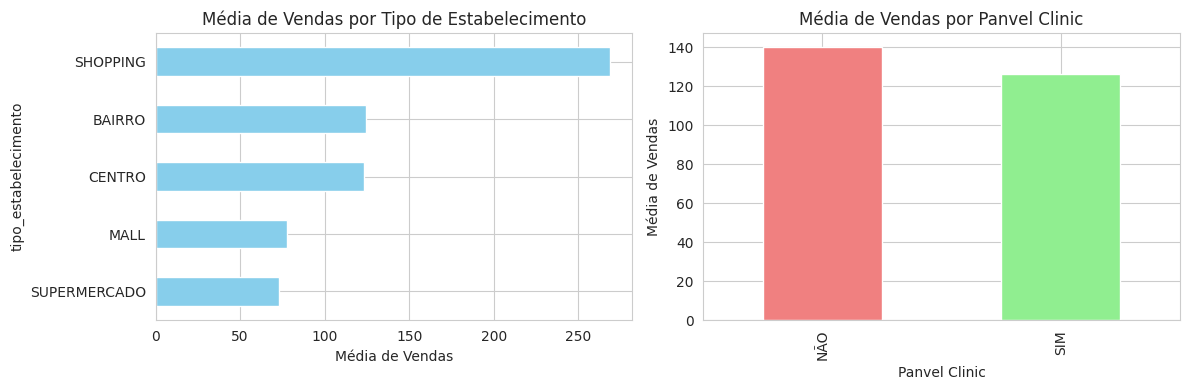

In [92]:
# Converter data para datetime e extrair mês/dia da semana
df_vendas_final['data'] = pd.to_datetime(df_vendas_final['data'])
df_vendas_final['mes'] = df_vendas_final['data'].dt.month
df_vendas_final['dia_semana'] = df_vendas_final['data'].dt.day_name()

# 6. SAZONALIDADE POR MÊS
print("\n\nSAZONALIDADE POR MÊS")
print("=" * 40)
sazonalidade_mes = df_vendas_final.groupby('mes').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean'
}).round(2)

print(sazonalidade_mes)

# 7. SAZONALIDADE POR DIA DA SEMANA
print("\n\nSAZONALIDADE POR DIA DA SEMANA")
print("=" * 40)
sazonalidade_dia = df_vendas_final.groupby('dia_semana').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean'
}).round(2)

# Ordenar por dias da semana
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sazonalidade_dia = sazonalidade_dia.reindex(dias_ordem)
print(sazonalidade_dia)

# 8. VISUALIZAÇÃO SIMPLES (opcional)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Média de vendas por tipo de estabelecimento
df_vendas_final.groupby('tipo_estabelecimento')['n_vendas'].mean().sort_values().plot(
    kind='barh', ax=axes[0], color='skyblue'
)
axes[0].set_title('Média de Vendas por Tipo de Estabelecimento')
axes[0].set_xlabel('Média de Vendas')

# Gráfico 2: Média de vendas por Panvel Clinic
df_vendas_final.groupby('panvel_clinic')['n_vendas'].mean().plot(
    kind='bar', ax=axes[1], color=['lightcoral', 'lightgreen']
)
axes[1].set_title('Média de Vendas por Panvel Clinic')
axes[1].set_xlabel('Panvel Clinic')
axes[1].set_ylabel('Média de Vendas')

plt.tight_layout()
plt.show()

In [ ]:
# 9. CORRELAÇÕES NUMÉRICAS
print("\n\nCORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS")
print("=" * 50)

# Criar variável dummy para Panvel Clinic
# df_vendas_final['panvel_numerico'] = (df_vendas_final['panvel_clinic'] == 'SIM').astype(int)

# Selecionar variáveis numéricas para correlação
variaveis_correlacao = ['n_vendas', 'faturamento', 'quantidade', 'metragem_area_venda', 'panvel_numerico']
correlacao = df_vendas_final[variaveis_correlacao].corr()

print("Matriz de Correlação:")
print(correlacao.round(3))

# Correlação específica entre metragem e vendas
print(f"\nCorrelação entre Metragem e Número de Vendas: {correlacao.loc['metragem_area_venda', 'n_vendas']:.3f}")
print(f"Correlação entre Metragem e Faturamento: {correlacao.loc['metragem_area_venda', 'faturamento']:.3f}")



CORRELAÇÕES ENTRE VARIÁVEIS NUMÉRICAS
Matriz de Correlação:
                     n_vendas  faturamento  quantidade  metragem_area_venda  \
n_vendas                1.000        0.615       0.475                0.076   
faturamento             0.615        1.000       0.742                0.283   
quantidade              0.475        0.742       1.000                0.113   
metragem_area_venda     0.076        0.283       0.113                1.000   
panvel_numerico        -0.098       -0.057      -0.024                0.202   

                     panvel_numerico  
n_vendas                      -0.098  
faturamento                   -0.057  
quantidade                    -0.024  
metragem_area_venda            0.202  
panvel_numerico                1.000  

Correlação entre Metragem e Número de Vendas: 0.076
Correlação entre Metragem e Faturamento: 0.283


In [44]:
# Converter variáveis categóricas em numéricas (SIM/NÃO para 1/0)
df_vendas_final['panvel_clinic_numeric'] = (df_vendas_final['panvel_clinic'] == 'SIM').astype(int)
df_vendas_final['estacionamento_numeric'] = (df_vendas_final['estacionamento'] == 'SIM').astype(int)
df_vendas_final['delivery_numeric'] = (df_vendas_final['delivery'] == 'SIM').astype(int)
df_vendas_final['atendimento_24h_numeric'] = (df_vendas_final['atendimento_24_horas'] == 'SIM').astype(int)

# Verificar conversões
print("Conversões realizadas:")
print(f"Panvel Clinic: {df_vendas_final['panvel_clinic_numeric'].unique()}")
print(f"Estacionamento: {df_vendas_final['estacionamento_numeric'].unique()}")
print(f"Delivery: {df_vendas_final['delivery_numeric'].unique()}")
print(f"Atendimento 24h: {df_vendas_final['atendimento_24h_numeric'].unique()}")

# Análise de correlação com faturamento
variaveis_correlacao = [
    'faturamento',
    'panvel_clinic_numeric',
    'estacionamento_numeric', 
    'delivery_numeric',
    'atendimento_24h_numeric',
    'metragem_area_venda',
    'quantidade',
    'n_vendas'
]

# Calcular matriz de correlação
correlacao_completa = df_vendas_final[variaveis_correlacao].corr()

print("\n" + "="*60)
print("CORRELAÇÃO COM FATURAMENTO")
print("="*60)

# Focar na correlação com faturamento
correlacao_faturamento = correlacao_completa['faturamento'].sort_values(ascending=False)

print("\nCorrelações com Faturamento (ordem decrescente):")
for var, corr in correlacao_faturamento.items():
    print(f"{var:25s}: {corr:.3f}")

# Análise específica das variáveis de interesse
print("\n" + "="*60)
print("ANÁLISE DAS VARIÁVEIS CATEGÓRICAS")
print("="*60)

variaveis_categoricas = ['panvel_clinic_numeric', 'estacionamento_numeric', 'delivery_numeric', 'atendimento_24h_numeric']

for var in variaveis_categoricas:
    nome_var = var.replace('_numeric', '')
    corr_val = correlacao_completa.loc['faturamento', var]
    
    print(f"\n{nome_var.upper()}:")
    print(f"  Correlação com faturamento: {corr_val:.3f}")
    
    # Ver diferença de médias
    media_sim = df_vendas_final[df_vendas_final[var] == 1]['faturamento'].mean()
    media_nao = df_vendas_final[df_vendas_final[var] == 0]['faturamento'].mean()
    diferenca = media_sim - media_nao
    
    print(f"  Média faturamento COM: R${media_sim:,.2f}")
    print(f"  Média faturamento SEM: R${media_nao:,.2f}")
    print(f"  Diferença: R${diferenca:,.2f}")
    
    if diferenca > 0:
        print(f"  Impacto positivo: +{diferenca/media_nao*100:.1f}%")
    else:
        print(f"  Impacto negativo: {diferenca/media_nao*100:.1f}%")

Conversões realizadas:
Panvel Clinic: [0 1]
Estacionamento: [0 1]
Delivery: [0 1]
Atendimento 24h: [0 1]

CORRELAÇÃO COM FATURAMENTO

Correlações com Faturamento (ordem decrescente):
faturamento              : 1.000
quantidade               : 0.742
n_vendas                 : 0.615
metragem_area_venda      : 0.283
atendimento_24h_numeric  : 0.109
estacionamento_numeric   : 0.075
delivery_numeric         : 0.070
panvel_clinic_numeric    : -0.057

ANÁLISE DAS VARIÁVEIS CATEGÓRICAS

PANVEL_CLINIC:
  Correlação com faturamento: -0.057
  Média faturamento COM: R$26,324.31
  Média faturamento SEM: R$29,448.09
  Diferença: R$-3,123.78
  Impacto negativo: -10.6%

ESTACIONAMENTO:
  Correlação com faturamento: 0.075
  Média faturamento COM: R$27,971.16
  Média faturamento SEM: R$21,783.53
  Diferença: R$6,187.63
  Impacto positivo: +28.4%

DELIVERY:
  Correlação com faturamento: 0.070
  Média faturamento COM: R$29,995.48
  Média faturamento SEM: R$26,131.39
  Diferença: R$3,864.09
  Impacto posit

In [45]:
# Verificar combinações mais comuns
print("\n" + "="*60)
print("COMBINAÇÕES DE SERVIÇOS MAIS COMUNS")
print("="*60)

# Criar uma coluna com a soma dos serviços
df_vendas_final['total_servicos'] = (
    df_vendas_final['panvel_clinic_numeric'] + 
    df_vendas_final['estacionamento_numeric'] + 
    df_vendas_final['delivery_numeric'] + 
    df_vendas_final['atendimento_24h_numeric']
)

# Análise por quantidade de serviços
servicos_analise = df_vendas_final.groupby('total_servicos').agg({
    'faturamento': 'mean',
    'n_vendas': 'mean',
    'codigo_filial': 'nunique'
}).round(2)

servicos_analise.columns = ['Média Faturamento', 'Média Vendas', 'Nº Filiais']
print(servicos_analise)

# Correlação entre número de serviços e faturamento
corr_servicos = df_vendas_final[['total_servicos', 'faturamento']].corr()
print(f"\nCorrelação entre nº de serviços e faturamento: {corr_servicos.iloc[0,1]:.3f}")


COMBINAÇÕES DE SERVIÇOS MAIS COMUNS
                Média Faturamento  Média Vendas  Nº Filiais
total_servicos                                             
0                        25778.87        161.04           3
1                        25445.13        132.21          31
2                        26985.41        129.80          61
3                        30321.16        127.52          29

Correlação entre nº de serviços e faturamento: 0.065


In [46]:
print("\n" + "="*60)
print("TESTE DE SIGNIFICÂNCIA (t-test simplificado)")
print("="*60)

from scipy import stats

for var in variaveis_categoricas:
    nome_var = var.replace('_numeric', '')
    
    grupo_sim = df_vendas_final[df_vendas_final[var] == 1]['faturamento']
    grupo_nao = df_vendas_final[df_vendas_final[var] == 0]['faturamento']
    
    # Teste t simples
    t_stat, p_value = stats.ttest_ind(grupo_sim, grupo_nao, equal_var=False)
    
    print(f"\n{nome_var.upper()}:")
    print(f"  t-statistic: {t_stat:.3f}")
    print(f"  p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"  CONCLUSÃO: Diferença ESTATISTICAMENTE SIGNIFICATIVA")
    else:
        print(f"  CONCLUSÃO: Diferença NÃO significativa")


TESTE DE SIGNIFICÂNCIA (t-test simplificado)

PANVEL_CLINIC:
  t-statistic: -10.427
  p-value: 0.0000
  CONCLUSÃO: Diferença ESTATISTICAMENTE SIGNIFICATIVA

ESTACIONAMENTO:
  t-statistic: 22.502
  p-value: 0.0000
  CONCLUSÃO: Diferença ESTATISTICAMENTE SIGNIFICATIVA

DELIVERY:
  t-statistic: 12.424
  p-value: 0.0000
  CONCLUSÃO: Diferença ESTATISTICAMENTE SIGNIFICATIVA

ATENDIMENTO_24H:
  t-statistic: 25.211
  p-value: 0.0000
  CONCLUSÃO: Diferença ESTATISTICAMENTE SIGNIFICATIVA


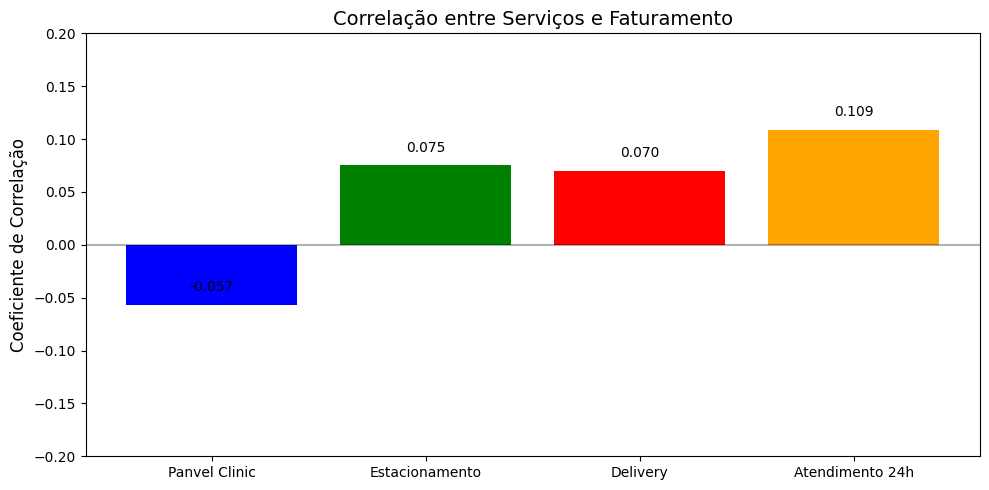

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar dados para gráfico
variaveis = ['Panvel Clinic', 'Estacionamento', 'Delivery', 'Atendimento 24h']
correlacoes = [
    correlacao_completa.loc['faturamento', 'panvel_clinic_numeric'],
    correlacao_completa.loc['faturamento', 'estacionamento_numeric'],
    correlacao_completa.loc['faturamento', 'delivery_numeric'],
    correlacao_completa.loc['faturamento', 'atendimento_24h_numeric']
]

# Criar gráfico
plt.figure(figsize=(10, 5))
bars = plt.bar(variaveis, correlacoes, color=['blue', 'green', 'red', 'orange'])
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Correlação entre Serviços e Faturamento', fontsize=14)
plt.ylabel('Coeficiente de Correlação', fontsize=12)
plt.ylim(-0.2, 0.2)

# Adicionar valores nas barras
for bar, corr in zip(bars, correlacoes):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{corr:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [54]:
# Converter variáveis categóricas em numéricas
df_vendas_final['panvel_clinic_numeric'] = (df_vendas_final['panvel_clinic'] == 'SIM').astype(int)
df_vendas_final['estacionamento_numeric'] = (df_vendas_final['estacionamento'] == 'SIM').astype(int)
df_vendas_final['delivery_numeric'] = (df_vendas_final['delivery'] == 'SIM').astype(int)
df_vendas_final['atendimento_24h_numeric'] = (df_vendas_final['atendimento_24_horas'] == 'SIM').astype(int)

# Criar variáveis numéricas para outras categorias
# Localidade (usando fatorização)
df_vendas_final['localidade_numeric'] = pd.factorize(df_vendas_final['localidade'])[0]

# Faixa de vida (usando fatorização)
df_vendas_final['faixa_vida_numeric'] = pd.factorize(df_vendas_final['faixa_vida'])[0]

# Tipo de estabelecimento (usando fatorização)
df_vendas_final['tipo_estabelecimento_numeric'] = pd.factorize(df_vendas_final['tipo_estabelecimento'])[0]

# UF (usando fatorização)
df_vendas_final['uf_numeric'] = pd.factorize(df_vendas_final['uf'])[0]

# Definir lista de todas as variáveis numéricas para correlação
variaveis_correlacao = [
    'faturamento',
    'n_vendas',
    'quantidade',
    'metragem_area_venda',
    
    # Serviços
    'panvel_clinic_numeric',
    'estacionamento_numeric', 
    'delivery_numeric',
    'atendimento_24h_numeric',
    
    # Características
    'localidade_numeric',
    'faixa_vida_numeric',
    'tipo_estabelecimento_numeric',
    'uf_numeric'
]

# Calcular matriz de correlação completa
correlacao_completa = df_vendas_final[variaveis_correlacao].corr()

print("="*70)
print("MATRIZ DE CORRELAÇÃO COMPLETA")
print("="*70)

# Renomear colunas para facilitar leitura
nomes_amigaveis = {
    'faturamento': 'Faturamento',
    'n_vendas': 'Nº Vendas',
    'quantidade': 'Quantidade',
    'metragem_area_venda': 'Metragem',
    'panvel_clinic_numeric': 'Panvel Clinic',
    'estacionamento_numeric': 'Estacionamento',
    'delivery_numeric': 'Delivery',
    'atendimento_24h_numeric': 'Atendimento 24h',
    'localidade_numeric': 'Localidade',
    'faixa_vida_numeric': 'Faixa Vida',
    'tipo_estabelecimento_numeric': 'Tipo Estab.',
    'uf_numeric': 'UF'
}

# Aplicar nomes amigáveis
correlacao_renomeada = correlacao_completa.copy()
correlacao_renomeada.index = [nomes_amigaveis.get(x, x) for x in correlacao_renomeada.index]
correlacao_renomeada.columns = [nomes_amigaveis.get(x, x) for x in correlacao_renomeada.columns]

# Mostrar matriz de correlação
print(correlacao_renomeada.round(3))

MATRIZ DE CORRELAÇÃO COMPLETA
                 Faturamento  Nº Vendas  Quantidade  Metragem  Panvel Clinic  \
Faturamento            1.000      0.615       0.742     0.283         -0.057   
Nº Vendas              0.615      1.000       0.475     0.076         -0.098   
Quantidade             0.742      0.475       1.000     0.113         -0.024   
Metragem               0.283      0.076       0.113     1.000          0.202   
Panvel Clinic         -0.057     -0.098      -0.024     0.202          1.000   
Estacionamento         0.075      0.069       0.050     0.060         -0.079   
Delivery               0.070     -0.108      -0.001     0.227          0.247   
Atendimento 24h        0.109      0.201       0.093    -0.005         -0.178   
Localidade            -0.072     -0.245      -0.068     0.089          0.227   
Faixa Vida            -0.135     -0.284      -0.107     0.003          0.168   
Tipo Estab.            0.054      0.171       0.059    -0.163         -0.210   
UF        

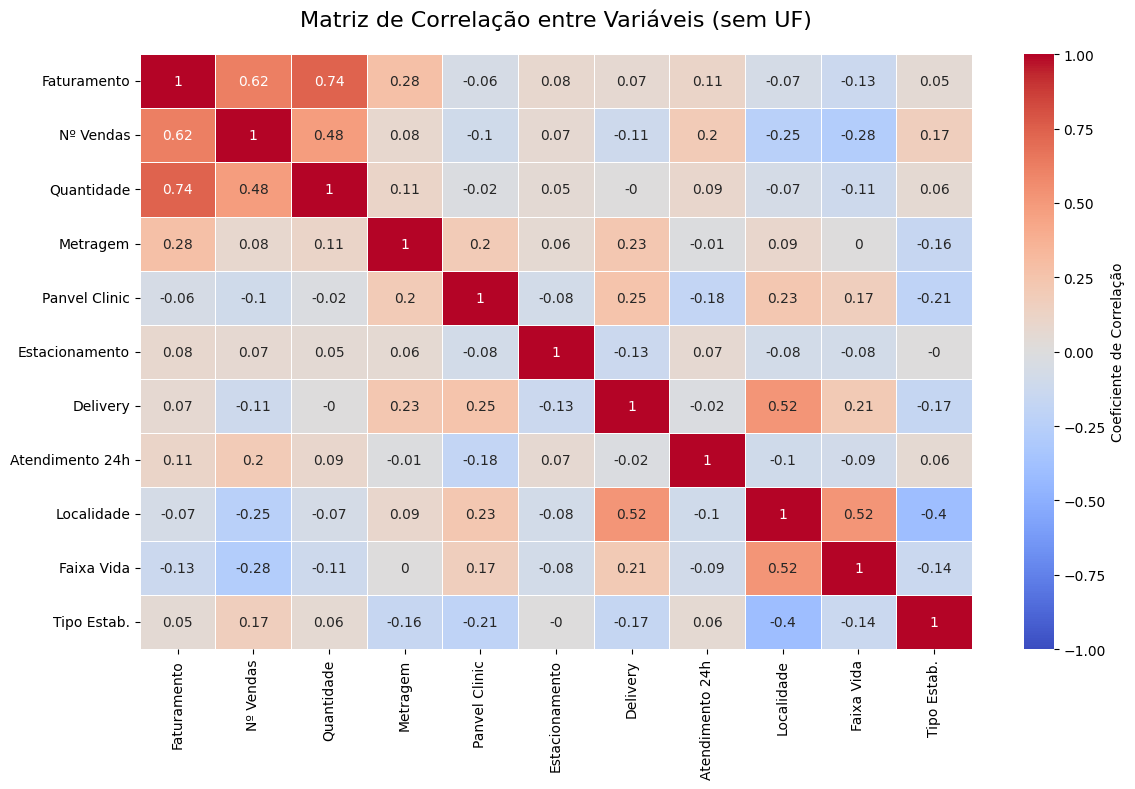

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover UF da matriz de correlação
correlacao_sem_uf = correlacao_renomeada.drop('UF', axis=0).drop('UF', axis=1)

# Criar heatmap sem UF
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao_sem_uf.round(2), 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'label': 'Coeficiente de Correlação'})

plt.title('Matriz de Correlação entre Variáveis (sem UF)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [58]:
# Converter a coluna de data para datetime
df_vendas_final['data'] = pd.to_datetime(df_vendas_final['data'])

# Extrair componentes temporais
df_vendas_final['ano'] = df_vendas_final['data'].dt.year
df_vendas_final['mes'] = df_vendas_final['data'].dt.month
df_vendas_final['dia'] = df_vendas_final['data'].dt.day
df_vendas_final['dia_semana'] = df_vendas_final['data'].dt.day_name()
df_vendas_final['semana_ano'] = df_vendas_final['data'].dt.isocalendar().week
df_vendas_final['trimestre'] = df_vendas_final['data'].dt.quarter

# Verificar os dados
print("Período dos dados:")
print(f"Data inicial: {df_vendas_final['data'].min()}")
print(f"Data final: {df_vendas_final['data'].max()}")
print(f"Total de dias: {df_vendas_final['data'].nunique()}")

Período dos dados:
Data inicial: 2025-01-01 00:00:00
Data final: 2025-12-31 00:00:00
Total de dias: 365


In [95]:
print("\n" + "="*50)
print("SAZONALIDADE POR MÊS")
print("="*50)

# Agrupar por mês
sazonalidade_mes = df_vendas_final.groupby('mes').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'data': 'count'
}).round(2)

sazonalidade_mes.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Dias Registrados']

# Ordenar os meses
meses_nomes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
sazonalidade_mes.index = [meses_nomes[i-1] for i in sazonalidade_mes.index]

print(sazonalidade_mes)



SAZONALIDADE POR MÊS
           Média Vendas  Média Faturamento  Média Quantidade  Dias Registrados
Janeiro          116.79           22999.23            894.42              3412
Fevereiro        130.18           26973.25           1006.12              3118
Março            127.21           25987.01           1027.88              3463
Abril            122.30           24101.06            933.94              3357
Maio             129.61           26824.43            987.15              3507
Junho            125.89           25092.05            913.46              3418
Julho            128.29           26345.56            944.27              3588
Agosto           131.78           26856.63            977.55              3635
Setembro         130.29           26730.00            949.81              3540
Outubro          128.31           25915.65            932.76              3711
Novembro         155.74           40286.55           1556.60              3642
Dezembro         138.64       

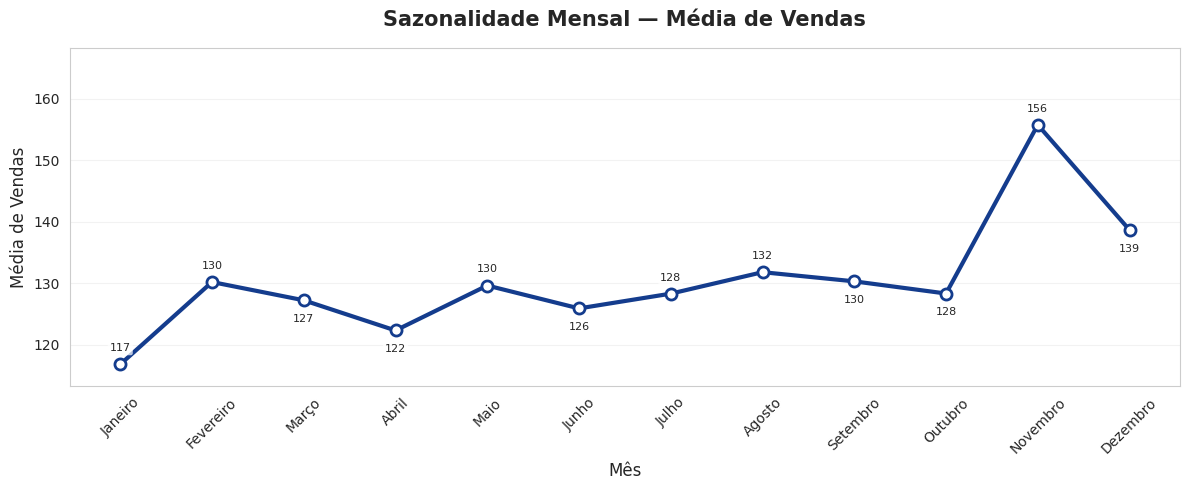

In [ ]:

sns.set_style("whitegrid")

# --- (seu agrupamento pode ficar igual) ---
sazonalidade_mes = df_vendas_final.groupby('mes').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'quantidade': 'mean',
    'data': 'count'
}).round(2)

sazonalidade_mes.columns = ['Média Vendas', 'Média Faturamento', 'Média Quantidade', 'Dias Registrados']

meses_nomes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
sazonalidade_mes.index = [meses_nomes[i-1] for i in sazonalidade_mes.index]

# --- gráfico melhorado ---
y = sazonalidade_mes['Média Vendas'].values
labels = sazonalidade_mes.index.tolist()
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(
    x, y,
    marker='o',
    linewidth=3,
    color='#143c8d',
    markersize=8,
    markerfacecolor='white',
    markeredgewidth=2
)

ax.set_title('Sazonalidade Mensal — Média de Vendas', fontsize=15, fontweight='bold', pad=16)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)

# Formatação do eixo Y (inteiro se fizer sentido)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Grid mais suave
ax.grid(True, axis='y', alpha=0.25)
ax.grid(False, axis='x')

# Folga vertical (evita rótulos “grudados”)
ax.set_ylim(y.min() * 0.97, y.max() * 1.08)

# (Opcional) rótulos bem discretos, alternando acima/abaixo
for i, val in enumerate(y):
    subiu = (i == 0) or (y[i] >= y[i-1])
    dy = 8 if subiu else -10
    va = 'bottom' if subiu else 'top'

    ax.annotate(
        f'{val:,.0f}',
        (x[i], val),
        textcoords='offset points',
        xytext=(0, dy),
        ha='center',
        va=va,
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.18', fc='white', ec='none', alpha=0.70)
    )

plt.tight_layout()
plt.show()


In [99]:
print("\n" + "="*50)
print("SAZONALIDADE POR DIA DA SEMANA")
print("="*50)

# Agrupar por dia da semana
sazonalidade_dia = df_vendas_final.groupby('dia_semana').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    #'data': 'count'
}).round(2)

sazonalidade_dia.columns = ['Média Vendas', 'Média Faturamento'] #, 'Dias Registrados'

# Ordenar os dias da semana corretamente
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dias_portugues = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
sazonalidade_dia = sazonalidade_dia.reindex(dias_ordem)
sazonalidade_dia.index = dias_portugues

print(sazonalidade_dia)

# Gráfico de sazonalidade por dia da semana
#plt.figure(figsize=(10, 5))
#bars = plt.bar(sazonalidade_dia.index, sazonalidade_dia['Média Vendas'], color='skyblue')
#plt.title('Sazonalidade por Dia da Semana - Média de Vendas', fontsize=14)
#plt.xlabel('Dia da Semana', fontsize=12)
#plt.ylabel('Média de Vendas', fontsize=12)

# Adicionar valores nas barras
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
#              f'{height:.0f}', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()


SAZONALIDADE POR DIA DA SEMANA
         Média Vendas  Média Faturamento
Segunda        129.82           27768.80
Terça          132.99           27907.11
Quarta         134.01           27758.16
Quinta         133.25           28091.46
Sexta          143.26           31000.69
Sábado         138.45           27650.02
Domingo        100.80           20574.43


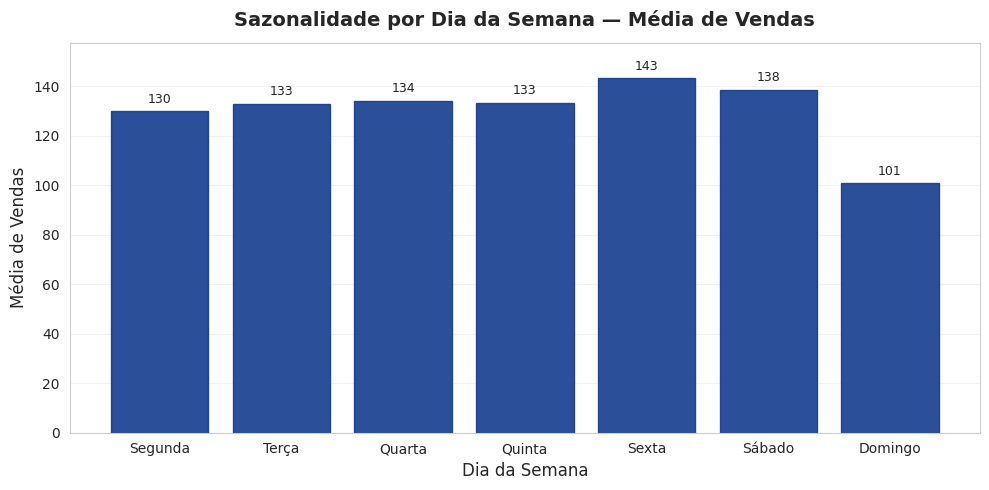

In [98]:
sns.set_style("whitegrid")

# Gráfico de sazonalidade por dia da semana (melhorado e simples)
fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(
    sazonalidade_dia.index,
    sazonalidade_dia['Média Vendas'],
    color='#143c8d',
    edgecolor='#143c8d',
    alpha=0.9
)

ax.set_title('Sazonalidade por Dia da Semana — Média de Vendas', fontsize=14, fontweight='bold', pad=12)
ax.set_xlabel('Dia da Semana', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

# Grid mais suave (só no Y)
ax.grid(True, axis='y', alpha=0.25)
ax.grid(False, axis='x')

# Eixo Y com separador de milhar
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Dar um espaço no topo pros rótulos não grudarem
ymax = sazonalidade_dia['Média Vendas'].max()
ax.set_ylim(0, ymax * 1.10)

# Valores nas barras (menores e com leve offset)
for bar in bars:
    height = bar.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (bar.get_x() + bar.get_width()/2, height),
        textcoords="offset points",
        xytext=(0, 4),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()


SAZONALIDADE POR TRIMESTRE
             Média Vendas  Média Faturamento  Dias Registrados
Trimestre 1        124.58           25274.59              9993
Trimestre 2        125.99           25359.38             10282
Trimestre 3        130.12           26644.61             10763
Trimestre 4        140.79           31559.25             11153


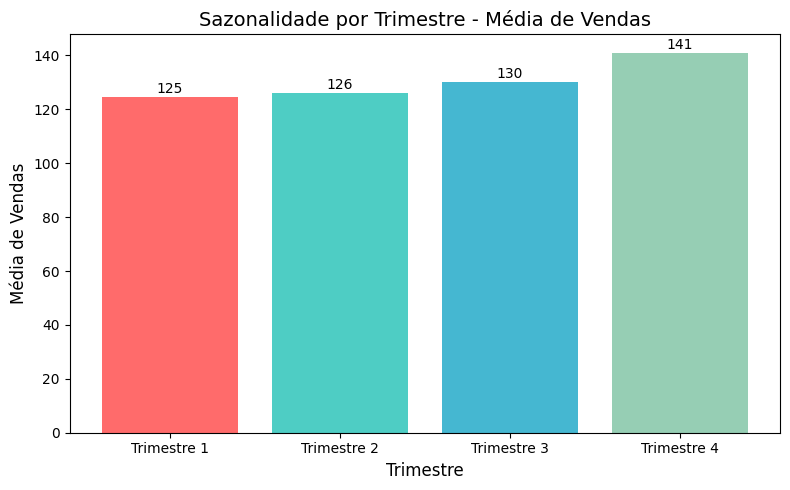

In [ ]:
print("\n" + "="*50)
print("SAZONALIDADE POR TRIMESTRE")
print("="*50)

# Agrupar por trimestre
sazonalidade_trimestre = df_vendas_final.groupby('trimestre').agg({
    'n_vendas': 'mean',
    'faturamento': 'mean',
    'data': 'count'
}).round(2)

sazonalidade_trimestre.columns = ['Média Vendas', 'Média Faturamento', 'Dias Registrados']
sazonalidade_trimestre.index = [f'Trimestre {i}' for i in sazonalidade_trimestre.index]

print(sazonalidade_trimestre)

# # Gráfico de sazonalidade por trimestre
# plt.figure(figsize=(8, 5))
# bars = plt.bar(sazonalidade_trimestre.index, sazonalidade_trimestre['Média Vendas'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
# plt.title('Sazonalidade por Trimestre - Média de Vendas', fontsize=14)
# plt.xlabel('Trimestre', fontsize=12)
# plt.ylabel('Média de Vendas', fontsize=12)

# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
#              f'{height:.0f}', ha='center', va='bottom')

# plt.tight_layout()
# plt.show()

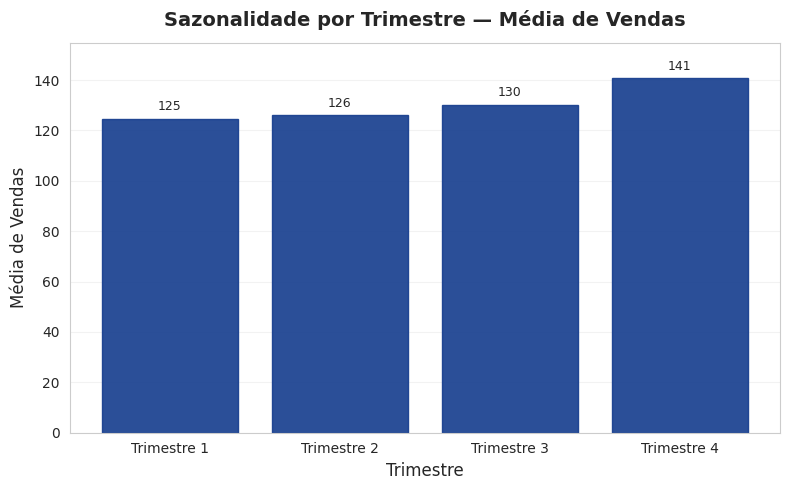

In [100]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.bar(
    sazonalidade_trimestre.index,
    sazonalidade_trimestre['Média Vendas'],
    color='#143c8d',
    edgecolor='#143c8d',
    alpha=0.9
)

ax.set_title('Sazonalidade por Trimestre — Média de Vendas', fontsize=14, fontweight='bold', pad=12)
ax.set_xlabel('Trimestre', fontsize=12)
ax.set_ylabel('Média de Vendas', fontsize=12)

ax.grid(True, axis='y', alpha=0.25)
ax.grid(False, axis='x')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ymax = sazonalidade_trimestre['Média Vendas'].max()
ax.set_ylim(0, ymax * 1.10)

for bar in bars:
    h = bar.get_height()
    ax.annotate(
        f'{h:,.0f}',
        (bar.get_x() + bar.get_width()/2, h),
        textcoords="offset points",
        xytext=(0, 4),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [64]:
# Converter a coluna de data para datetime
df_vendas_final['data'] = pd.to_datetime(df_vendas_final['data'])

# Extrair componentes temporais
df_vendas_final['ano'] = df_vendas_final['data'].dt.year
df_vendas_final['mes'] = df_vendas_final['data'].dt.month
df_vendas_final['dia'] = df_vendas_final['data'].dt.day
df_vendas_final['dia_semana'] = df_vendas_final['data'].dt.day_name()
df_vendas_final['semana_ano'] = df_vendas_final['data'].dt.isocalendar().week
df_vendas_final['trimestre'] = df_vendas_final['data'].dt.quarter

# Verificar os dados
print("Período dos dados:")
print(f"Data inicial: {df_vendas_final['data'].min()}")
print(f"Data final: {df_vendas_final['data'].max()}")
print(f"Total de dias: {df_vendas_final['data'].nunique()}")

Período dos dados:
Data inicial: 2025-01-01 00:00:00
Data final: 2025-12-31 00:00:00
Total de dias: 365


In [90]:
# Agrupar por mês - SOMENTE FATURAMENTO
sazonalidade_mes_faturamento = df_vendas_final.groupby('mes')['faturamento'].mean().round(2)

# Ordenar os meses
meses_nomes = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
sazonalidade_mes_faturamento.index = [meses_nomes[i-1] for i in sazonalidade_mes_faturamento.index]

# Mostrar resultados
for mes, faturamento in sazonalidade_mes_faturamento.items():
    print(f"{mes:12s}: R$ {faturamento:,.2f}")

Janeiro     : R$ 22,999.23
Fevereiro   : R$ 26,973.25
Março       : R$ 25,987.01
Abril       : R$ 24,101.06
Maio        : R$ 26,824.43
Junho       : R$ 25,092.05
Julho       : R$ 26,345.56
Agosto      : R$ 26,856.63
Setembro    : R$ 26,730.00
Outubro     : R$ 25,915.65
Novembro    : R$ 40,286.55
Dezembro    : R$ 28,706.23


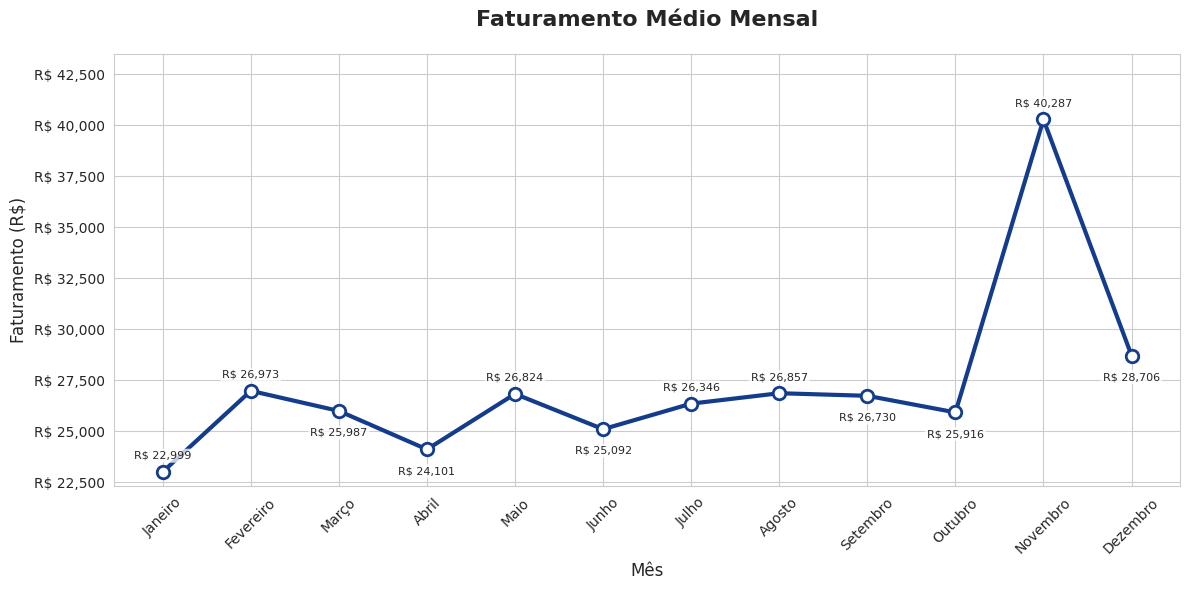

In [91]:
sns.set_style("whitegrid")

y = sazonalidade_mes_faturamento.values
labels = sazonalidade_mes_faturamento.index
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    x, y,
    marker='o', linewidth=3, color='#143c8d', markersize=9,
    markerfacecolor='white', markeredgewidth=2
)

ax.set_title('Faturamento Médio Mensal', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Faturamento (R$)', fontsize=12)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)

# Formatação correta do eixo Y (evita set_yticklabels manual)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('R$ {x:,.0f}'))

# Dá “folga” no topo pro label de Novembro não grudar
ax.set_ylim(y.min() * 0.97, y.max() * 1.08)

# Rótulos: menores + com fundo + alternando acima/abaixo
for i, val in enumerate(y):
    subiu = (i == 0) or (y[i] >= y[i-1])
    dy = 8 if subiu else -12
    va = 'bottom' if subiu else 'top'

    # opção 1: valor completo
    texto = f'R$ {val:,.0f}'

    # opção 2 (mais limpa): em "k" -> descomenta e comenta a linha acima
    # texto = f'R$ {val/1000:.1f}k'

    ax.annotate(
        texto,
        (x[i], val),
        textcoords="offset points",
        xytext=(0, dy),
        ha='center',
        va=va,
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.18', fc='white', ec='none', alpha=0.75)
    )

plt.tight_layout()
plt.show()


In [103]:
df_vendas_final

,codigo_filial,data,quantidade,faturamento,n_vendas,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,...,atendimento_24h_numeric,total_servicos,localidade_numeric,faixa_vida_numeric,tipo_estabelecimento_numeric,uf_numeric,ano,dia,semana_ano,trimestre
0,1500,2025-01-02,828.0,18077.83704,138,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,...,0,0,0,0,0,0,2025,2,1,1
1,1500,2025-01-03,1107.0,29631.50298,188,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,...,0,0,0,0,0,0,2025,3,1,1
2,1500,2025-01-04,597.0,14137.64100,98,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,...,0,0,0,0,0,0,2025,4,1,1
3,1500,2025-01-06,975.0,21558.72465,166,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,...,0,0,0,0,0,0,2025,6,2,1
4,1500,2025-01-07,969.0,25274.68470,165,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,...,0,0,0,0,0,0,2025,7,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42186,1887,2025-12-27,597.0,17850.20877,99,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,...,0,2,2,3,4,0,2025,27,52,4
42187,1887,2025-12-28,291.0,9301.56894,62,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,...,0,2,2,3,4,0,2025,28,52,4
42188,1887,2025-12-29,537.0,17140.43700,88,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,...,0,2,2,3,4,0,2025,29,1,4
42189,1887,2025-12-30,735.0,16174.26540,106,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,...,0,2,2,3,4,0,2025,30,1,4


In [105]:
df_vendas_meta_final

,codigo_filial,data_meta_venda,meta_n_med,data,faixa_vida,localidade,uf,tipo_estabelecimento,delivery,metragem_area_venda,panvel_clinic,estacionamento,atendimento_24_horas
0,1500,2025-01-01 03:00:00.000,0.00,2025-01-01,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
1,1500,2025-01-02 03:00:00.000,12732.76,2025-01-02,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
2,1500,2025-01-03 03:00:00.000,12732.76,2025-01-03,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
3,1500,2025-01-04 03:00:00.000,12732.76,2025-01-04,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
4,1500,2025-01-05 03:00:00.000,0.00,2025-01-05,MAIS DE 3 ANOS,CURITIBA,PR,CENTRO,NÃO,309.0388,NÃO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42648,1887,2025-12-27 03:00:00.000,15986.05,2025-12-27,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42649,1887,2025-12-28 03:00:00.000,16638.55,2025-12-28,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42650,1887,2025-12-29 03:00:00.000,16312.30,2025-12-29,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO
42651,1887,2025-12-30 03:00:00.000,14681.07,2025-12-30,MENOS DE 1 ANO,MARINGA,PR,SUPERMERCADO,NÃO,632.4274,SIM,SIM,NÃO


In [114]:
df_vendas_final.columns

Index(['codigo_filial', 'data', 'quantidade', 'faturamento', 'n_vendas',
       'faixa_vida', 'localidade', 'uf', 'tipo_estabelecimento', 'delivery',
       'metragem_area_venda', 'panvel_clinic', 'estacionamento',
       'atendimento_24_horas', 'categoria_tamanho', 'mes', 'dia_semana',
       'panvel_numerico', 'panvel_clinic_numeric', 'estacionamento_numeric',
       'delivery_numeric', 'atendimento_24h_numeric', 'total_servicos',
       'localidade_numeric', 'faixa_vida_numeric',
       'tipo_estabelecimento_numeric', 'uf_numeric', 'ano', 'dia',
       'semana_ano', 'trimestre'],
      dtype='str')

In [119]:

import statsmodels.formula.api as smf

df = df_vendas_final.copy()

# remove colunas que você não quer
drop_cols = [c for c in ["panvel_numerico", "uf", "uf_numeric"] if c in df.columns]
if drop_cols:
    df = df.drop(columns=drop_cols)

# -----------------------
# 1) Detecta binárias 0/1
# -----------------------
def find_binary_cols(df):
    cols = []
    for c in df.columns:
        s = df[c].dropna()
        if s.empty:
            continue
        vals = set(pd.unique(s))
        if vals.issubset({0, 1}) and len(vals) == 2:
            cols.append(c)
    return cols

bin_cols = find_binary_cols(df)

# remove variáveis que você não quer (se aparecer algo estranho)
bin_cols = [c for c in bin_cols if c not in ["ano"]]

print("Binárias usadas:", bin_cols)

# -----------------------
# 2) Escolhe colunas categóricas (usa string se existir; senão usa _numeric como categórica)
# -----------------------
tipo_col = "tipo_estabelecimento" if "tipo_estabelecimento" in df.columns else "tipo_estabelecimento_numeric"

# -----------------------
# 3) Função do modelo (cluster por filial)
# -----------------------
def fit_cluster_ols(df, y, add_time_controls=False):
    base_cols = ["codigo_filial", y, "metragem_area_venda", tipo_col] + bin_cols

    # controles de tempo (opcional)
    if add_time_controls:
        time_cols = [c for c in ["semana_ano", "trimestre"] if c in df.columns]
        base_cols += time_cols

    dfm = df[base_cols].dropna().copy()
    dfm["log_y"] = np.log1p(dfm[y])

    # FIX para pandas nullable ints (ex.: UInt32Dtype) ao usar C()
    if add_time_controls:
        for c in ["semana_ano", "trimestre"]:
            if c in dfm.columns:
                dfm[c] = dfm[c].astype("int64")

    formula = "log_y ~ metragem_area_venda + " \
              + " + ".join(bin_cols) \
              + f" + C({tipo_col})"

    if add_time_controls:
        if "semana_ano" in dfm.columns:
            formula += " + C(semana_ano)"
        if "trimestre" in dfm.columns:
            formula += " + C(trimestre)"

    model = smf.ols(formula, data=dfm).fit(
        cov_type="cluster",
        cov_kwds={"groups": dfm["codigo_filial"]}
    )

    print(f"\n=== OLS clusterizado por filial | y={y} | n={len(dfm)} | time_controls={add_time_controls} ===")
    print(model.summary().tables[1])

    # Interpretação prática das binárias: approx % change = (exp(beta)-1)*100
    b = model.params.reindex(bin_cols)
    p = model.pvalues.reindex(bin_cols)
    pct = (np.exp(b) - 1) * 100

    out = pd.DataFrame({"beta": b, "p": p, "approx_%": pct}).sort_values("p")
    print("\n--- Binárias: efeito aproximado (%) ---")
    print(out.to_string())

    return model

# -----------------------
# 4) Rode para cada outcome (sem e com controles de tempo)
# -----------------------
for y in ["faturamento", "n_vendas", "quantidade"]:
    fit_cluster_ols(df, y, add_time_controls=False)

# Se quiser controlar por sazonalidade:
# for y in ["faturamento", "n_vendas", "quantidade"]:
#     fit_cluster_ols(df, y, add_time_controls=True)


Binárias usadas: ['panvel_clinic_numeric', 'estacionamento_numeric', 'delivery_numeric', 'atendimento_24h_numeric']

=== OLS clusterizado por filial | y=faturamento | n=42191 | time_controls=False ===
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   9.0074      0.201     44.784      0.000       8.613       9.402
C(tipo_estabelecimento)[T.CENTRO]          -0.0351      0.071     -0.496      0.620      -0.174       0.104
C(tipo_estabelecimento)[T.MALL]            -0.4421      0.113     -3.911      0.000      -0.664      -0.221
C(tipo_estabelecimento)[T.SHOPPING]         0.8074      0.163      4.948      0.000       0.488       1.127
C(tipo_estabelecimento)[T.SUPERMERCADO]    -1.1072      0.065    -16.912      0.000      -1.236      -0.979
metragem_area_venda                        

## Texto técnico

Ajustamos um modelo de regressão linear (OLS) com transformação **log1p** do desfecho, usando erros-padrão **robustos clusterizados por `codigo_filial`** para lidar com a dependência temporal dentro de cada filial. O modelo inclui controles por **tipo de estabelecimento** (`C(tipo_estabelecimento)`) e **metragem da área de venda** (`metragem_area_venda`), além das variáveis binárias de perfil: `panvel_clinic_numeric`, `estacionamento_numeric`, `delivery_numeric` e `atendimento_24h_numeric`.

No modelo para **faturamento**, a variável **`atendimento_24h_numeric`** é a única binária com evidência estatística (p=0,028), com coeficiente **β≈0,515**. Na escala log1p, isso corresponde a um efeito aproximado de **+67%** em faturamento para lojas 24h em relação a não-24h, **mantendo constantes** tipo de estabelecimento e metragem. As demais binárias (**delivery**, **estacionamento** e **Panvel Clinic**) não são estatisticamente significativas (p>0,05), sugerindo que, após controlar por porte e composição do tipo de loja, não há evidência de efeito adicional robusto dessas características sobre o faturamento.

Os controles estruturais do modelo também são relevantes: **`metragem_area_venda`** apresenta coeficiente positivo e significativo (p<0,001), indicando associação positiva entre tamanho da loja e faturamento. Em relação ao tipo de estabelecimento (comparado ao tipo de referência omitido), **SHOPPING** apresenta coeficiente positivo e significativo, enquanto **MALL** e **SUPERMERCADO** apresentam coeficientes negativos e significativos, indicando diferenças sistemáticas de performance entre formatos de loja quando controlamos pelos demais fatores.

De forma consistente com o padrão observado em outros desfechos (ex.: **quantidade**), **`atendimento_24h_numeric`** mantém coeficiente positivo em torno de **0,50** (efeito aproximado ~**+66%**), enquanto as demais binárias permanecem sem significância estatística — reforçando a interpretação de que o sinal mais robusto, entre os perfis binários avaliados, é a condição de atendimento 24h.

## Insights para o negócio (Panvel)

Quando controlamos por **formato da loja** (tipo de estabelecimento) e **tamanho** (metragem), o atributo que mais se destaca é **ser uma loja com atendimento 24h**. Mesmo comparando lojas “parecidas” em termos de porte e categoria, as lojas 24h apresentam um ganho forte e consistente — aproximadamente **+65% a +67%** nos indicadores de venda (ex.: faturamento), com evidência estatística no modelo.

Por outro lado, **delivery**, **estacionamento** e **Panvel Clinic** não aparecem como “drivers independentes” no modelo multivariado. Isso sugere que a vantagem observada em análises simples pode estar ligada ao **perfil das lojas** onde essas features estão presentes (ex.: tipo de loja, porte, localização/composição), e não necessariamente a um impacto direto dessas características por si só. Em termos práticos: para decisões estratégicas, o dado indica que **o efeito incremental mais claro e consistente no desempenho está associado ao funcionamento 24h**, enquanto as demais alavancas precisam de análises adicionais (por exemplo, segmentação por tipo de loja, porte e praça) para entender em quais contextos elas realmente geram retorno.

Além disso, o modelo confirma que **porte e formato importam**: lojas maiores tendem a vender mais, e há diferenças relevantes entre tipos de estabelecimento (por exemplo, lojas em **SHOPPING** tendem a performar acima da categoria base, enquanto **SUPERMERCADO** e **MALL** ficam abaixo). Um caminho direto para o negócio é usar esses resultados como base para **priorização**: (1) avaliar expansão/otimização de operações **24h** onde houver viabilidade operacional e demanda, e (2) tratar delivery/estacionamento/clinic como iniciativas que provavelmente exigem **segmentação e foco** (não “one-size-fits-all”), pois o efeito médio geral não se sustenta quando comparamos lojas equivalentes.


In [126]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

df = df_vendas_final.copy()

# Garantias mínimas
df["data"] = pd.to_datetime(df["data"], errors="coerce")

# Se tiver redundância panvel_numerico, remove (opcional)
if "panvel_numerico" in df.columns:
    df = df.drop(columns=["panvel_numerico"])

# Definição das colunas
y = "faturamento"
bin_cols = ["atendimento_24h_numeric", "delivery_numeric", "panvel_clinic_numeric", "estacionamento_numeric"]
cont_cols = ["metragem_area_venda"]  # "tamanho da loja" = metragem_area_venda (evite duplicar)
cat_cols = ["tipo_estabelecimento", "faixa_vida"]

# Filtra só o necessário e remove NA
use_cols = [y] + bin_cols + cont_cols + cat_cols
dfm = df[use_cols].dropna().copy()

# Resposta em log1p
dfm["log_faturamento"] = np.log1p(dfm[y])

# Fórmula
formula = (
    "log_faturamento ~ "
    + " + ".join(bin_cols + cont_cols)
    + " + C(tipo_estabelecimento) + C(faixa_vida)"
)

# Ajusta OLS simples (sem cluster)
m = smf.ols(formula, data=dfm).fit()

print(m.summary())

# Resumo “mais legível” das variáveis numéricas/binárias
b = m.params.reindex(bin_cols + cont_cols)
p = m.pvalues.reindex(bin_cols + cont_cols)
approx_pct = (np.exp(b) - 1) * 100  # leitura prática em %
out = pd.DataFrame({"beta": b, "p": p, "approx_%": approx_pct}).sort_values("p")

print("\n=== Efeitos (binárias/contínuas) em termos aproximados (%) ===")
print(out.to_string())


                            OLS Regression Results                            
Dep. Variable:        log_faturamento   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     1190.
Date:                Sun, 08 Feb 2026   Prob (F-statistic):               0.00
Time:                        17:10:54   Log-Likelihood:                -30535.
No. Observations:               42191   AIC:                         6.110e+04
Df Residuals:                   42178   BIC:                         6.121e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [127]:
coef_table = pd.DataFrame({
    "coef": m.params,
    "std_err": m.bse,
    "t": m.tvalues,
    "p": m.pvalues,
})

ci = m.conf_int()
ci.columns = ["ci_low", "ci_high"]
coef_table = coef_table.join(ci)

# imprime tudo (sem truncar)
print(coef_table.to_string())

                                             coef   std_err           t              p    ci_low   ci_high
Intercept                                8.650351  0.016332  529.669655   0.000000e+00  8.618341  8.682361
C(tipo_estabelecimento)[T.CENTRO]        0.029466  0.005705    5.164519   2.421520e-07  0.018283  0.040649
C(tipo_estabelecimento)[T.MALL]         -0.258400  0.018574  -13.911780   6.718940e-44 -0.294806 -0.221994
C(tipo_estabelecimento)[T.SHOPPING]      0.771661  0.011848   65.127971   0.000000e+00  0.748438  0.794884
C(tipo_estabelecimento)[T.SUPERMERCADO] -0.711299  0.095229   -7.469344   8.214866e-14 -0.897949 -0.524648
C(faixa_vida)[T.ENTRE 2-3 ANOS]          0.346102  0.012513   27.659253  6.714109e-167  0.321576  0.370628
C(faixa_vida)[T.MAIS DE 3 ANOS]          0.448530  0.008974   49.979812   0.000000e+00  0.430940  0.466120
C(faixa_vida)[T.MENOS DE 1 ANO]          0.031327  0.014748    2.124204   3.365893e-02  0.002421  0.060233
atendimento_24h_numeric              

Eu rodei uma regressão múltipla com log1p(faturamento) para comparar o efeito das características da loja controlando por tipo e faixa de vida. O maior driver entre as binárias foi atendimento 24h (~+62%), seguido por delivery (~+15%). A metragem também tem forte associação positiva. Ressalto que essa versão sem cluster serve para leitura inicial; como existem observações repetidas por filial, eu valido a inferência com erros robustos clusterizados por codigo_filial e, se necessário, com efeitos fixos para controlar heterogeneidade entre lojas. Os resultados são associações e não causalidade

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# -----------------------
# 0) Preparação
# -----------------------
df = df_vendas_final.copy()

# (opcional) remove redundâncias que você já identificou
for c in ["panvel_numerico", "uf", "uf_numeric"]:
    if c in df.columns:
        df = df.drop(columns=[c])

y = "faturamento"

bin_cols = ["atendimento_24h_numeric", "delivery_numeric", "panvel_clinic_numeric", "estacionamento_numeric"]
cat_cols = ["tipo_estabelecimento", "faixa_vida"]
cont_cols = ["metragem_area_venda"]

use_cols = ["codigo_filial", y] + bin_cols + cont_cols + cat_cols
dfm = df[use_cols].dropna().copy()

dfm["log_y"] = np.log1p(dfm[y])

formula = (
    "log_y ~ "
    + " + ".join(bin_cols + cont_cols)
    + " + C(tipo_estabelecimento) + C(faixa_vida)"
)

# -----------------------
# 1) Ajusta os 2 modelos
# -----------------------
m_plain = smf.ols(formula, data=dfm).fit()

m_cluster = smf.ols(formula, data=dfm).fit(
    cov_type="cluster",
    cov_kwds={"groups": dfm["codigo_filial"]}
)

# sanity check: coeficientes devem ser (quase) iguais
max_abs_diff = (m_plain.params - m_cluster.params).abs().max()
print("Máxima diferença absoluta nos coeficientes (plain vs cluster):", max_abs_diff)

# -----------------------
# 2) Tabela comparativa (TODAS as covariáveis)
# -----------------------
idx = m_plain.params.index  # mesma ordem/mesmas variáveis

comp = pd.DataFrame({
    "coef": m_plain.params.loc[idx],
    "se_plain": m_plain.bse.loc[idx],
    "p_plain": m_plain.pvalues.loc[idx],
    "se_cluster": m_cluster.bse.loc[idx],
    "p_cluster": m_cluster.pvalues.loc[idx],
})

# efeito em % (aprox) na escala log1p: (exp(beta)-1)*100
comp["approx_%"] = (np.exp(comp["coef"]) - 1) * 100

# ordena por p_cluster (mais conservador)
comp = comp.sort_values("p_cluster")

# imprime tudo sem truncar
print(comp.to_string())

# (opcional) salva para usar no report
#comp.to_csv("compare_plain_vs_cluster.csv", index=True)


Máxima diferença absoluta nos coeficientes (plain vs cluster): 0.0
                                             coef  se_plain        p_plain  se_cluster     p_cluster       approx_%
Intercept                                8.650351  0.016332   0.000000e+00    0.197133  0.000000e+00  571115.025733
C(faixa_vida)[T.MAIS DE 3 ANOS]          0.448530  0.008974   0.000000e+00    0.063080  1.156105e-12      56.600854
C(tipo_estabelecimento)[T.SUPERMERCADO] -0.711299  0.095229   8.214866e-14    0.106958  2.925206e-11     -50.899383
C(tipo_estabelecimento)[T.SHOPPING]      0.771661  0.011848   0.000000e+00    0.162098  1.931609e-06     116.335590
metragem_area_venda                      0.001735  0.000026   0.000000e+00    0.000389  8.081066e-06       0.173642
C(faixa_vida)[T.ENTRE 2-3 ANOS]          0.346102  0.012513  6.714109e-167    0.095411  2.861923e-04      41.354671
C(tipo_estabelecimento)[T.MALL]         -0.258400  0.018574   6.718940e-44    0.082692  1.778871e-03     -22.771394
deliv

Você ajustou uma regressão múltipla para **`log1p(faturamento)`** e comparou a inferência **sem correção** (erros-padrão “nonrobust”) com a versão **clusterizada por `codigo_filial`**, apropriada porque existem **múltiplas observações ao longo do tempo para cada filial**. Como esperado, os **coeficientes estimados são idênticos** (diferença máxima = 0,0), pois o OLS estima os mesmos efeitos médios; o que muda de forma relevante é a **incerteza** (erros-padrão) e, consequentemente, os **p-values**. Ao aplicar cluster por filial, os erros-padrão aumentam para várias variáveis — o que indica que a regressão simples estava superestimando a significância ao tratar observações dentro da mesma loja como independentes.

Com base na inferência **mais conservadora e adequada (p_cluster)**, os resultados apontam que variáveis estruturais e de maturidade da filial explicam uma parcela importante das diferenças de faturamento. Em particular, **filiais mais maduras** apresentam faturamento significativamente maior: lojas com **“mais de 3 anos”** têm um efeito estimado de **+56,6%** em relação à categoria de referência, e lojas entre **2 e 3 anos** apresentam **+41,4%**, mantendo constantes as demais covariáveis. O **tipo de estabelecimento** também é um determinante forte: lojas em **SHOPPING** exibem um diferencial elevado (**+116,3%**), enquanto lojas em **SUPERMERCADO** apresentam desempenho inferior (**−50,9%**) e lojas em **MALL** também ficam abaixo (**−22,8%**), sempre em comparação com o tipo base do modelo. Além disso, o **tamanho da loja** (metragem) tem associação positiva robusta: o coeficiente de **0,001735 por m²** implica um aumento aproximado de **0,17%** no faturamento por **+1 m²**, o que se acumula de forma relevante (por exemplo, **+10 m² ≈ +1,75%** e **+100 m² ≈ +18,9%**).

Entre as características operacionais (binárias) avaliadas, duas mantêm evidência estatística após o ajuste por cluster. A variável **`atendimento_24h_numeric`** tem coeficiente **0,483**, correspondente a um efeito aproximado de **+62,2%** no faturamento (p_cluster ≈ 0,041). A variável **`delivery_numeric`** também aparece como positiva, com coeficiente **0,137**, representando cerca de **+14,7%** (p_cluster ≈ 0,034). Esses resultados sugerem que atendimento 24h e delivery podem estar associados a maior faturamento mesmo após controlar por porte, maturidade e tipo de loja — embora a evidência estatística fique no limite quando reconhecemos a dependência intra-filial, o que reforça a necessidade de cautela na interpretação causal. Por outro lado, variáveis como **`estacionamento_numeric`** (**+4,6%**) e **`panvel_clinic_numeric`** (**−3,3%**) **perdem significância** no modelo com cluster, indicando que os sinais observados na regressão simples provavelmente refletiam subestimação do erro-padrão; portanto, não há evidência robusta, no efeito médio geral, de que essas características expliquem o faturamento de forma independente quando as demais covariáveis são controladas. Em síntese, a análise reforça que **formato da loja, maturidade e metragem** são os fatores mais consistentes, enquanto **24h e delivery** aparecem como alavancas operacionais relevantes, e os demais atributos binários exigem análises segmentadas ou modelos adicionais para verificar em quais contextos podem gerar impacto.


In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = df_vendas_final.copy()

features = [
    "metragem_area_venda",
    "atendimento_24h_numeric",
    "delivery_numeric",
    "panvel_clinic_numeric",
    "estacionamento_numeric",
    "quantidade",
    "n_vendas",
    "faturamento",
]

X = df[features].dropna().copy()
X["faturamento"] = np.log1p(X["faturamento"])  # opcional (estabiliza)
X["quantidade"] = np.log1p(X["quantidade"])
X["n_vendas"] = np.log1p(X["n_vendas"])

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(Xz)

print("Explained variance (PC1, PC2):", pca.explained_variance_ratio_)
loadings = pd.DataFrame(pca.components_.T, index=features, columns=["PC1","PC2"])
print(loadings.sort_values("PC1", key=np.abs, ascending=False))


Explained variance (PC1, PC2): [0.36330974 0.18965346]
                              PC1       PC2
quantidade               0.568615  0.023371
faturamento              0.559119  0.116275
n_vendas                 0.552032 -0.040320
atendimento_24h_numeric  0.167349 -0.217951
metragem_area_venda      0.122673  0.506535
estacionamento_numeric   0.094342 -0.183692
panvel_clinic_numeric   -0.078372  0.566402
delivery_numeric        -0.035023  0.570678


In [131]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = df_vendas_final.copy()

# agrega por filial
agg = df.groupby("codigo_filial").agg(
    metragem_area_venda=("metragem_area_venda","mean"),
    atendimento_24h=("atendimento_24h_numeric","max"),
    delivery=("delivery_numeric","max"),
    clinic=("panvel_clinic_numeric","max"),
    estacionamento=("estacionamento_numeric","max"),
    faturamento_medio=("faturamento","mean"),
    n_vendas_medio=("n_vendas","mean"),
    quantidade_media=("quantidade","mean"),
).dropna()

# log nas métricas de volume (opcional)
for c in ["faturamento_medio","n_vendas_medio","quantidade_media"]:
    agg[c] = np.log1p(agg[c])

X = agg.copy()
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
agg["cluster"] = kmeans.fit_predict(Xz)

print(agg["cluster"].value_counts())
print("\nPerfil médio por cluster:")
print(agg.groupby("cluster").mean().round(3))


cluster
0    72
1    38
3    13
2     1
Name: count, dtype: int64

Perfil médio por cluster:
         metragem_area_venda  atendimento_24h  delivery  clinic  estacionamento  faturamento_medio  n_vendas_medio  quantidade_media
cluster                                                                                                                             
0                    498.459            0.000     0.292   0.708             1.0              9.893           4.607             6.648
1                    524.644            0.105     0.263   0.684             1.0             10.506           5.132             7.233
2                   1140.731            0.000     1.000   0.000             1.0             11.842           5.800             8.074
3                    489.304            0.000     0.462   0.769             0.0              9.958           4.733             6.729


In [134]:
import numpy as np
import pandas as pd

df = df_vendas_final.copy()
cols = ["faturamento","n_vendas","quantidade","metragem_area_venda",
        "atendimento_24h_numeric","delivery_numeric","panvel_clinic_numeric","estacionamento_numeric"]

dfm = df[cols].dropna().copy()
dfm["faturamento"] = np.log1p(dfm["faturamento"])
dfm["n_vendas"] = np.log1p(dfm["n_vendas"])
dfm["quantidade"] = np.log1p(dfm["quantidade"])

corr = dfm.corr(method="spearman")
print(corr.round(3))


                         faturamento  n_vendas  quantidade  metragem_area_venda  atendimento_24h_numeric  delivery_numeric  panvel_clinic_numeric  estacionamento_numeric
faturamento                    1.000     0.866       0.923                0.131                    0.174             0.059                 -0.035                   0.112
n_vendas                       0.866     1.000       0.938                0.016                    0.186            -0.119                 -0.101                   0.074
quantidade                     0.923     0.938       1.000                0.056                    0.180            -0.084                 -0.078                   0.094
metragem_area_venda            0.131     0.016       0.056                1.000                   -0.055             0.210                  0.292                   0.013
atendimento_24h_numeric        0.174     0.186       0.180               -0.055                    1.000            -0.022                 -0.178     